In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [3]:
df = pd.read_csv('train.csv') 
df_test = pd.read_csv('test.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [6]:
columns = []
for i in df.columns:
    if df[i].dtypes=='object':
        columns.append(i)
print('Below Columns have object datatype which needs to be converted to Int\n\n',columns)

Below Columns have object datatype which needs to be converted to Int

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [7]:
for i in df.columns:
    a = df[i].isna().sum()
    if a > 0:
        print(i,'column has',a,'NaN values')

LotFrontage column has 214 NaN values
Alley column has 1091 NaN values
MasVnrType column has 7 NaN values
MasVnrArea column has 7 NaN values
BsmtQual column has 30 NaN values
BsmtCond column has 30 NaN values
BsmtExposure column has 31 NaN values
BsmtFinType1 column has 30 NaN values
BsmtFinType2 column has 31 NaN values
FireplaceQu column has 551 NaN values
GarageType column has 64 NaN values
GarageYrBlt column has 64 NaN values
GarageFinish column has 64 NaN values
GarageQual column has 64 NaN values
GarageCond column has 64 NaN values
PoolQC column has 1161 NaN values
Fence column has 931 NaN values
MiscFeature column has 1124 NaN values


In [8]:
for i in df.columns:
    a=df[i].value_counts()
    b=len(a.index)
    print(i,'column has',b,'categorical data counts\n')

Id column has 1168 categorical data counts

MSSubClass column has 15 categorical data counts

MSZoning column has 5 categorical data counts

LotFrontage column has 106 categorical data counts

LotArea column has 892 categorical data counts

Street column has 2 categorical data counts

Alley column has 2 categorical data counts

LotShape column has 4 categorical data counts

LandContour column has 4 categorical data counts

Utilities column has 1 categorical data counts

LotConfig column has 5 categorical data counts

LandSlope column has 3 categorical data counts

Neighborhood column has 25 categorical data counts

Condition1 column has 9 categorical data counts

Condition2 column has 8 categorical data counts

BldgType column has 5 categorical data counts

HouseStyle column has 8 categorical data counts

OverallQual column has 10 categorical data counts

OverallCond column has 9 categorical data counts

YearBuilt column has 110 categorical data counts

YearRemodAdd column has 61 categ

# Findings

1. Id column has unified information which is not usable in building model hence we can dropped the column.
2. MSSubClass is categorical column that identifies the type of dwelling involved in the sale and has no Null values.
3. MSZoning column has categorical data that identifies the general zoning classification of the sale and it has no Null values.
4. LotFrontage column is a Linear feet of street connected to property and has continuous data with NaN values in it.
5. LotArea column is a Lot size in square feet which has continuous data.
6. Street column is a categorical data that shows the type of road access to property and has no Null values.
7. Alley column is a categorical data that shows the type of alley access to property and has 1091 Null values hence we can drop that column since filling NaN values can make a whole model biased.
8. LotShape column is a categorical data that shows the general shape of property and has no Null values.
9. LandContour has categorical data that shows Flatness of the property and has no Null Values.
10. Utilities column has categorical data that shows Type of utilities available but have only one value hence we can drop the column since it will not help model to train in anyway.
11. LotConfig column has categorical data that shows Lot configuration and has no Null values.
12. LandSlope column has categorical data that shows Slope of property and has no Null values.
13. Neighborhood column has categorical data that shows Physical locations within Ames city limits and has no Null values.
14. Condition1 and Condition2 column has categorical data that shows Proximity to various conditions and has no Null values.
15. BldgType column has categorical data that shows Type of dwelling and has no Null Values.
16. HouseStyle column has categorical data that shows Style of dwelling and has no Null values.
17. OverallQual column has categorical data that shows Rating of overall material and finish of the house and has no Null values.
18. OverallCond column has categorical data that shows Rating of overall condition of the house and has no Null values.
19. YearBuilt column has date information that shows Original construction date and has no null values.
20. YearRemodAdd column has date information that shows remodel date if not then it is same as Original construction date and has no null values.
21. RoofStyle column has categorical data that shows Type of roof and has no null values.
22. RoofMatl column has categorical data that shows Roof material and has no null values.
23. Exterior1st and Exterior2nd column has categorical data that shows Exterior covering on house and has no null values.
24. MasVnrType column has categorical data that shows Masonry veneer type and has Null values in it.
25. MasVnrArea column has continuous data that shows Masonry veneer area in square feet however there are 692 data points which has 0 values since those home does not have Masonry veneer this question becomes invalid and since around 60% data is invalid in this dataset we can drop this column.
26. ExterQual column has categorical data that shows the quality of the material on the exterior and has no Null values.
27. ExterCond column has categorical data that shows present condition of the material on the exterior and has no Null Values.
28. Foundation column has categorical data that shows the Type of foundation and has no Null values.
29. BsmtQual column has categorical data that evaluates the height of the basement and has the Null values.
30. BsmtCond column has categorical data that evaluates the general condition of the basement and has the Null values.
31. BsmtExposure column has categorical data that refers to walkout or garden level walls and has Null values.
32. BsmtFinType1 and BsmtFinType2 column has categorical data that shows the Rating of basement finished area and has Null values.
33. BsmtFinSF1 and BsmtFinSF2 column has categorical data that shows Type 1 and 2 finished square feet and has no Null values.
34. BsmtUnfSF column has continuous data that shows Unfinished square feet of basement area and has no Null values.
35. TotalBsmtSF column has continuous data that shows Total square feet of basement area and has no Null values.
36. Heating column has categorical data that shows Type of heating and has no Null values.
37. HeatingQC column has categorical data that shows Heating quality and condition and has no Null values.
38. CentralAir column has categorical data that shows Central air conditioning exist or not and has no Null values.
39. Electrical column has categorical data that shows Electrical system and has no Null values.
40. 1stFlrSF column has continuous data that shows First Floor square feet and has no Null values.
41. 2ndFlrSF column has continuous data that shows Second floor square feet and has no Null values.
42. LowQualFinSF column has continuous data that shows Low quality finished square feet (all floors) and has no Null values.
43. GrLivArea column has continuous data that shows Above grade (ground) living area square feet and has no Null values.
44. BsmtFullBath column has categorical data that shows Number of Basement full bathrooms and has no Null values.
45. BsmtHalfBath column has categorical data that shows Number of Basement half bathrooms and has no Null values.
46. FullBath column has categorical data that shows Number of Full bathrooms above grade and has no Null values.
47. HalfBath column has categorical data that shows number of Half bathrooms above grade and has no Null values.
48. BedroomAbvGr column has categorical data that shows number of Bedrooms above grade (does NOT include basement bedrooms) and has no Null values.
49. KitchenAbvGr column has categorical data that shows Kitchens above grade and has no Null values.
50. KitchenQual column has categorical data that shows Kitchen quality and has no Null values.
51. TotRmsAbvGrd column has categorical data that shows Total rooms above grade (does not include bathrooms) and has no Null values.
52. Functional column has categorical data that shows Home functionality (Assume typical unless deductions are warranted) and has no Null values.
53. Fireplaces column has categorical data that shows Number of fireplaces and has no Null values.
54. FireplaceQu column has categorical data that shows Fireplace quality and half of the data is filled Null values hence we can drop the column.
55. GarageType column has categorical data that shows Garage Type and has Null values.
56. GarageYrBlt column has continuous data that shows Year garage was built and has Null values.
57. GarageFinish column has categorical data that shows Interior finish condition of the garage and has Null values.
58. GarageCars column has categorical data that shows Size of garage in car capacity and has no Null values.
59. GarageArea column has continuous data that shows Size of garage in square feet and has no Null values.
60. GarageQual column has categorical data that shows Garage quality and has Null values.
61. GarageCond column has categorical data that shows Garage condition and has Null values.
62. PavedDrive column has categorical data that shows Paved driveway and has no Null values.
63. WoodDeckSF column has continuous data that shows Wood deck area in square feet and has no Null values.
64. OpenPorchSF column has continuous data that shows Open porch area in square feet and has no Null values.
65. EnclosedPorch column has continuous data that shows Enclosed porch area in square feet and has no Null values.
66. 3SsnPorch column has continuous data that shows Three season porch area in square feet and has no Null values.
67. ScreenPorch column has continuous data that shows Screen porch area in square feet and has no Null values.
68. PoolArea column has continuous data that shows Pool area in square feet however out of the entire dataset only 7 homes have pool.
69. PoolQC column has continuous data that shows Pool quality however in this case 99% of data are NaN hence we can drop this column.
70. Fence column has categorical data that shows Fence quality however in this case 80% of data are NaN hence we can drop this column.
71. MiscFeature column has categorical data that shows Miscellaneous feature not covered in other categories and has 1124 NaN in the data hence have dropped the column.
72. MiscVal column has continuous data that shows Value of miscellaneous feature however in 1126 cases there is no value given as there is no MiscFeature available hence we can drop this column.
73. MoSold column has categorical data that shows Month Sold (MM) and has no Null values.
74. YrSold column has categorical data that shows Year Sold (YYYY) and has no Null values.
75. SaleType column has categorical data that shows Type of sale and has no Null values.
76. SaleCondition column has categorical data that shows Condition of sale and has no Null values.
77. SalePrice column is the Label column and has continuous data that shows selling price also it has no Null values.

In [9]:
df['LotShape'] = df['LotShape'].replace({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
df['ExterQual'] = df['ExterQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['ExterCond'] = df['ExterCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['BsmtQual'] = df['BsmtQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df['BsmtCond'] = df['BsmtCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df['BsmtExposure'] = df['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})
df['BsmtFinType1'] = df['BsmtFinType1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
df['BsmtFinType2'] = df['BsmtFinType2'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
df['HeatingQC'] = df['HeatingQC'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['KitchenQual'] = df['KitchenQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['Functional'] = df['Functional'].replace({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
df['GarageFinish'] = df['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1,'NA':0})
df['GarageQual'] = df['GarageQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df['GarageCond'] = df['GarageCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df['PavedDrive'] = df['PavedDrive'].replace({'Y':2,'P':1,'N':0})

In [10]:
df_test['LotShape'] = df_test['LotShape'].replace({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
df_test['ExterQual'] = df_test['ExterQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df_test['ExterCond'] = df_test['ExterCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df_test['BsmtQual'] = df_test['BsmtQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df_test['BsmtCond'] = df_test['BsmtCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df_test['BsmtExposure'] = df_test['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
df_test['HeatingQC'] = df_test['HeatingQC'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df_test['KitchenQual'] = df_test['KitchenQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df_test['Functional'] = df_test['Functional'].replace({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
df_test['GarageFinish'] = df_test['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1,'NA':0})
df_test['GarageQual'] = df_test['GarageQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df_test['GarageCond'] = df_test['GarageCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df_test['PavedDrive'] = df_test['PavedDrive'].replace({'Y':2,'P':1,'N':0})

In [11]:
df = df.drop(['Id','Alley','Utilities','MasVnrArea','PoolQC','FireplaceQu','Fence','MiscFeature','MiscVal'],axis=1)

In [12]:
df_test = df_test.drop(['Id','Alley','Utilities','MasVnrArea','PoolQC','FireplaceQu','Fence','MiscFeature','MiscVal'],axis=1)

- dropped Id, Alley, Utilities, MasVnrArea, PoolQC, FireplaceQu, Fence, MiscFeature, and MiscVal columnn as per the explaination given in the findings.

In [13]:
columns = []
for i in df.columns:
    if df[i].dtypes=='object':
        columns.append(i)
print('Below Columns have object datatype which needs to be converted to Int\n\n',columns)

Below Columns have object datatype which needs to be converted to Int

 ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']


In [14]:
for i in df.columns:
    a = df[i].isna().sum()
    if a > 0:
        print(i,'column has',a,'NaN values')

LotFrontage column has 214 NaN values
MasVnrType column has 7 NaN values
BsmtQual column has 30 NaN values
BsmtCond column has 30 NaN values
BsmtExposure column has 31 NaN values
BsmtFinType1 column has 30 NaN values
BsmtFinType2 column has 31 NaN values
GarageType column has 64 NaN values
GarageYrBlt column has 64 NaN values
GarageFinish column has 64 NaN values
GarageQual column has 64 NaN values
GarageCond column has 64 NaN values


In [15]:
df['LotFrontage'] = df['LotFrontage'].fillna(60.0)
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna(3.0)
df['BsmtCond'] = df['BsmtCond'].fillna(3.0)
df['BsmtExposure'] = df['BsmtExposure'].fillna(1.0)
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(1.0)
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(1.0)
df['GarageType'] = df['GarageType'].fillna('Attchd')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(2006.0)
df['GarageFinish'] = df['GarageFinish'].fillna(1.0)
df['GarageQual'] = df['GarageQual'].fillna(3.0)
df['GarageCond'] = df['GarageCond'].fillna(3.0)

Filled NaN with Mode in case of categorical data and Mean in case of continuous data

In [16]:
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(60.0)
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(3.0)
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(3.0)
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(1.0)
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(1.0)
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(1.0)
df_test['GarageType'] = df_test['GarageType'].fillna('Attchd')
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(2006.0)
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(1.0)
df_test['GarageQual'] = df_test['GarageQual'].fillna(3.0)
df_test['GarageCond'] = df_test['GarageCond'].fillna(3.0)

In [17]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street  LotShape LandContour  \
0            120       RL         60.0     4928   Pave         3         Lvl   
1             20       RL         95.0    15865   Pave         3         Lvl   
2             60       RL         92.0     9920   Pave         3         Lvl   
3             20       RL        105.0    11751   Pave         3         Lvl   
4             20       RL         60.0    16635   Pave         3         Lvl   
...          ...      ...          ...      ...    ...       ...         ...   
1163          20       RL         60.0     9819   Pave         3         Lvl   
1164          20       RL         67.0     8777   Pave         4         Lvl   
1165         160       RL         24.0     2280   Pave         4         Lvl   
1166          70  C (all)         50.0     8500   Pave         4         Lvl   
1167          60       RL         60.0     7861   Pave         3         Lvl   

     LotConfig LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch  \
0       Inside       Gtl      NPkVill  ...         205             0   
1       Inside       Mod        NAmes  ...         207             0   
2      CulDSac       Gtl      NoRidge  ...         130             0   
3       Inside       Gtl       NWAmes  ...         122             0   
4          FR2       Gtl       NWAmes  ...           0             0   
...        ...       ...          ...  ...         ...           ...   
1163    Inside       Gtl       Sawyer  ...           0             0   
1164    Inside       Gtl      Edwards  ...          96             0   
1165       FR2       Gtl      NPkVill  ...           0             0   
1166    Inside       Gtl       IDOTRR  ...          54           172   
1167    Inside       Gtl      Gilbert  ...          75             0   

     3SsnPorch ScreenPorch  PoolArea  MoSold  YrSold  SaleType SaleCondition  \
0            0           0         0       2    2007        WD        Normal   
1            0         224         0      10    2007        WD        Normal   
2            0           0         0       6    2007        WD        Normal   
3            0           0         0       1    2010       COD        Normal   
4            0           0         0       6    2009        WD        Normal   
...        ...         ...       ...     ...     ...       ...           ...   
1163         0           0         0       2    2010        WD        Normal   
1164         0           0         0       5    2009        WD        Normal   
1165         0           0         0       7    2009        WD        Normal   
1166         0           0         0       7    2008        WD        Normal   
1167         0           0         0       6    2006        WD        Normal   

     SalePrice  
0       128000  
1       268000  
2       269790  
3       190000  
4       215000  
...        ...  
1163    122000  
1164    108000  
1165    148500  
1166     40000  
1167    183200  

[1168 rows x 72 columns]

Data looks fine to encode into Int

In [18]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [19]:
df_test = df_test.dropna()

In [20]:
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]=enc.fit_transform(df_test[i].values.reshape(-1,1))

Endcoded data into Int

In [21]:
df.describe()

MSSubClass     MSZoning  LotFrontage        LotArea       Street  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean     56.767979     3.013699    68.975171   10484.749144     0.996575   
std      41.940650     0.633120    22.836520    8957.442311     0.058445   
min      20.000000     0.000000    21.000000    1300.000000     0.000000   
25%      20.000000     3.000000    60.000000    7621.500000     1.000000   
50%      50.000000     3.000000    64.000000    9522.500000     1.000000   
75%      70.000000     3.000000    79.250000   11515.500000     1.000000   
max     190.000000     4.000000   313.000000  164660.000000     1.000000   

          LotShape  LandContour    LotConfig    LandSlope  Neighborhood  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  ...   
mean      3.595890     2.773973     3.004281     0.064212     12.145548  ...   
std       0.571578     0.710027     1.642667     0.284088      6.010364  ...   
min       1.000000     0.000000     0.000000     0.000000      0.000000  ...   
25%       3.000000     3.000000     2.000000     0.000000      7.000000  ...   
50%       4.000000     3.000000     4.000000     0.000000     12.000000  ...   
75%       4.000000     3.000000     4.000000     0.000000     17.000000  ...   
max       4.000000     3.000000     4.000000     2.000000     24.000000  ...   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.559932      23.015411     3.639555    15.051370     3.448630   
std      66.381023      63.191089    29.088867    55.080816    44.896939   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      24.000000       0.000000     0.000000     0.000000     0.000000   
75%      70.000000       0.000000     0.000000     0.000000     0.000000   
max     547.000000     552.000000   508.000000   480.000000   738.000000   

            MoSold       YrSold     SaleType  SaleCondition      SalePrice  
count  1168.000000  1168.000000  1168.000000    1168.000000    1168.000000  
mean      6.344178  2007.804795     7.465753       3.768836  181477.005993  
std       2.686352     1.329738     1.619459       1.112208   79105.586863  
min       1.000000  2006.000000     0.000000       0.000000   34900.000000  
25%       5.000000  2007.000000     8.000000       4.000000  130375.000000  
50%       6.000000  2008.000000     8.000000       4.000000  163995.000000  
75%       8.000000  2009.000000     8.000000       4.000000  215000.000000  
max      12.000000  2010.000000     8.000000       5.000000  755000.000000  

[8 rows x 72 columns]

In [22]:
x = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

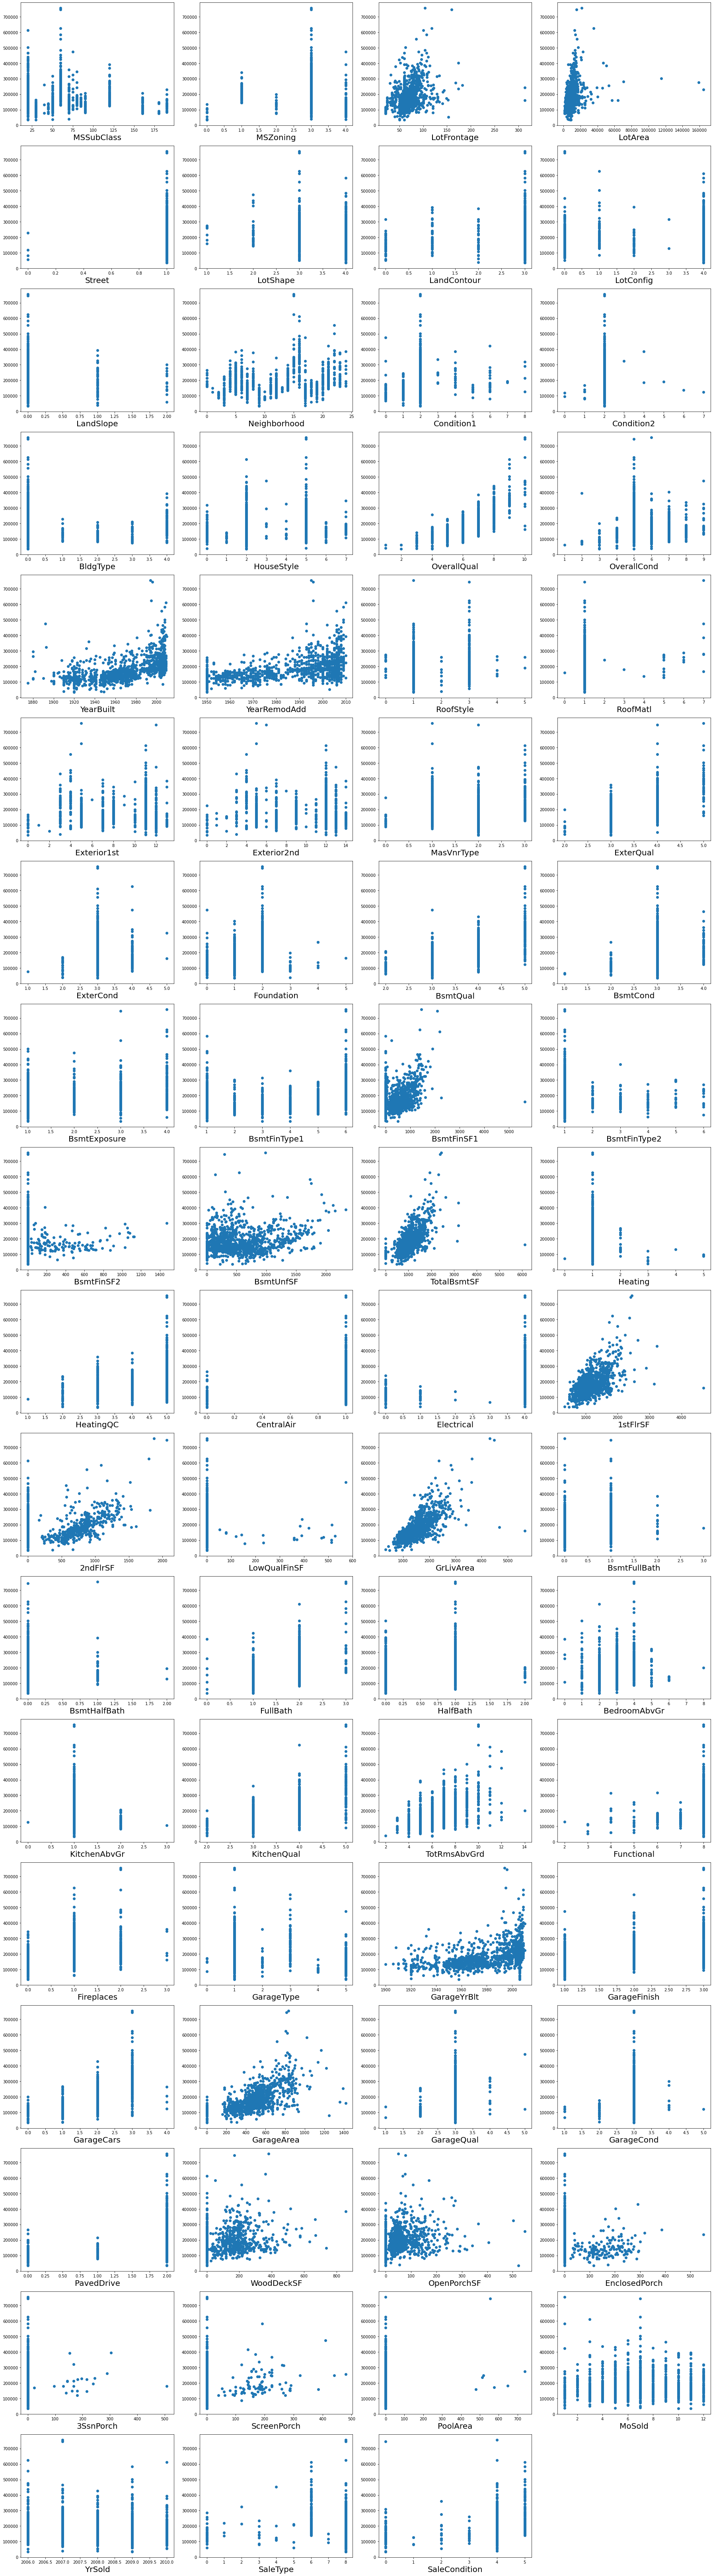

In [23]:
plt.figure(figsize=(25,90), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 72:
        ax = plt.subplot(18,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [24]:
for i in df.columns:
    a = df[i].corr(df['SalePrice'])
    print(i,'=',a)

MSSubClass = -0.060774811746989
MSZoning = -0.13322102084725676
LotFrontage = 0.3194143986403685
LotArea = 0.24949855755169295
Street = 0.04475345647916613
LotShape = -0.26026287382484986
LandContour = 0.03283563756913426
LotConfig = -0.0604517121089209
LandSlope = 0.01548479508052613
Neighborhood = 0.1989420892079251
Condition1 = 0.10581998211534108
Condition2 = 0.03395592146772994
BldgType = -0.06602800682821555
HouseStyle = 0.20550247745774353
OverallQual = 0.7891854326077523
OverallCond = -0.06564233066557884
YearBuilt = 0.5144075581459777
YearRemodAdd = 0.5078305923369405
RoofStyle = 0.1926540007088025
RoofMatl = 0.15986453842108736
Exterior1st = 0.10845097223570266
Exterior2nd = 0.09754050114558324
MasVnrType = 0.0077315055418008555
ExterQual = 0.6726653855334178
ExterCond = 0.03828198357637046
Foundation = 0.3741686082260583
BsmtQual = 0.6532652035251544
BsmtCond = 0.18162468162075576
BsmtExposure = 0.3298839874854488
BsmtFinType1 = 0.2976519518035019
BsmtFinSF1 = 0.362874361687

- OverallQual, YearBuilt, YearRemodAdd, ExterQual, BsmtQual, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, KitchenQual, TotRmsAbvGrd, GarageFinish, GarageCars and GarageArea has high co-relation with Label.
- MSSubClass, LandContour, LotConfig, LandSlope, Condition2, BldgType, OverallCond, MasVnrType, ExterCond, BsmtFinType2, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, 3SsnPorch, YrSold and SaleType has Low/No co-relation with Label.

# Findings

###### Below variables are important in making prediction and these variables affects the price of houses.

1. OverallQual = It is very important that the house should be built with good quality materials and this column rates the overall material and finish of the house.
2. YearBuilt = It is important that the construction should be new as it increases to life of the house and this column shows the original year of construction.
3. YearRemodAdd = It is important that if the construction is old then it should be remodel to increase its lifespan and this column shows the remodel date.
4. ExterQual = It is important to use good quality material for exterior of the house and this column evaluates the quality of the material on the exterior. 
5. BsmtQual = The price of the house is also depending upon the height of the basement and this column shows the height of the basement.
6. TotalBsmtSF = The price of the house is also depending upon total square feet of basement area and this column shows the basement area.
7. 1stFlrSF = If the house has 1 floor, then the price of the house increases and this column shows the first-Floor square feet.
8. GrLivArea = More the above grade (ground) living area square feet more will be the price of the house and GrLivArea contains the information of living area square feet.
9. FullBath = Number of full bathrooms affects the price of the house and this column shows the number of full bathrooms.
10. KitchenQual = Quality of kitchen is very important. A top-rated kitchen quality can increase the price of the house and this column shows the Quality of kitchen.
11. TotRmsAbvGrd = high number of rooms will lead to high prices and this column gives the count of total rooms.
12. GarageFinish = People want their garages to be fully finished and this result in high price of the house. This column shows the condition of the garage.
13. GarageCars = It is important to know how much cars a house owner can park in his garage and this column gives that count.
14. GarageArea = Large area of garage results in increasing of house price and this column provides information about garage area in feet.



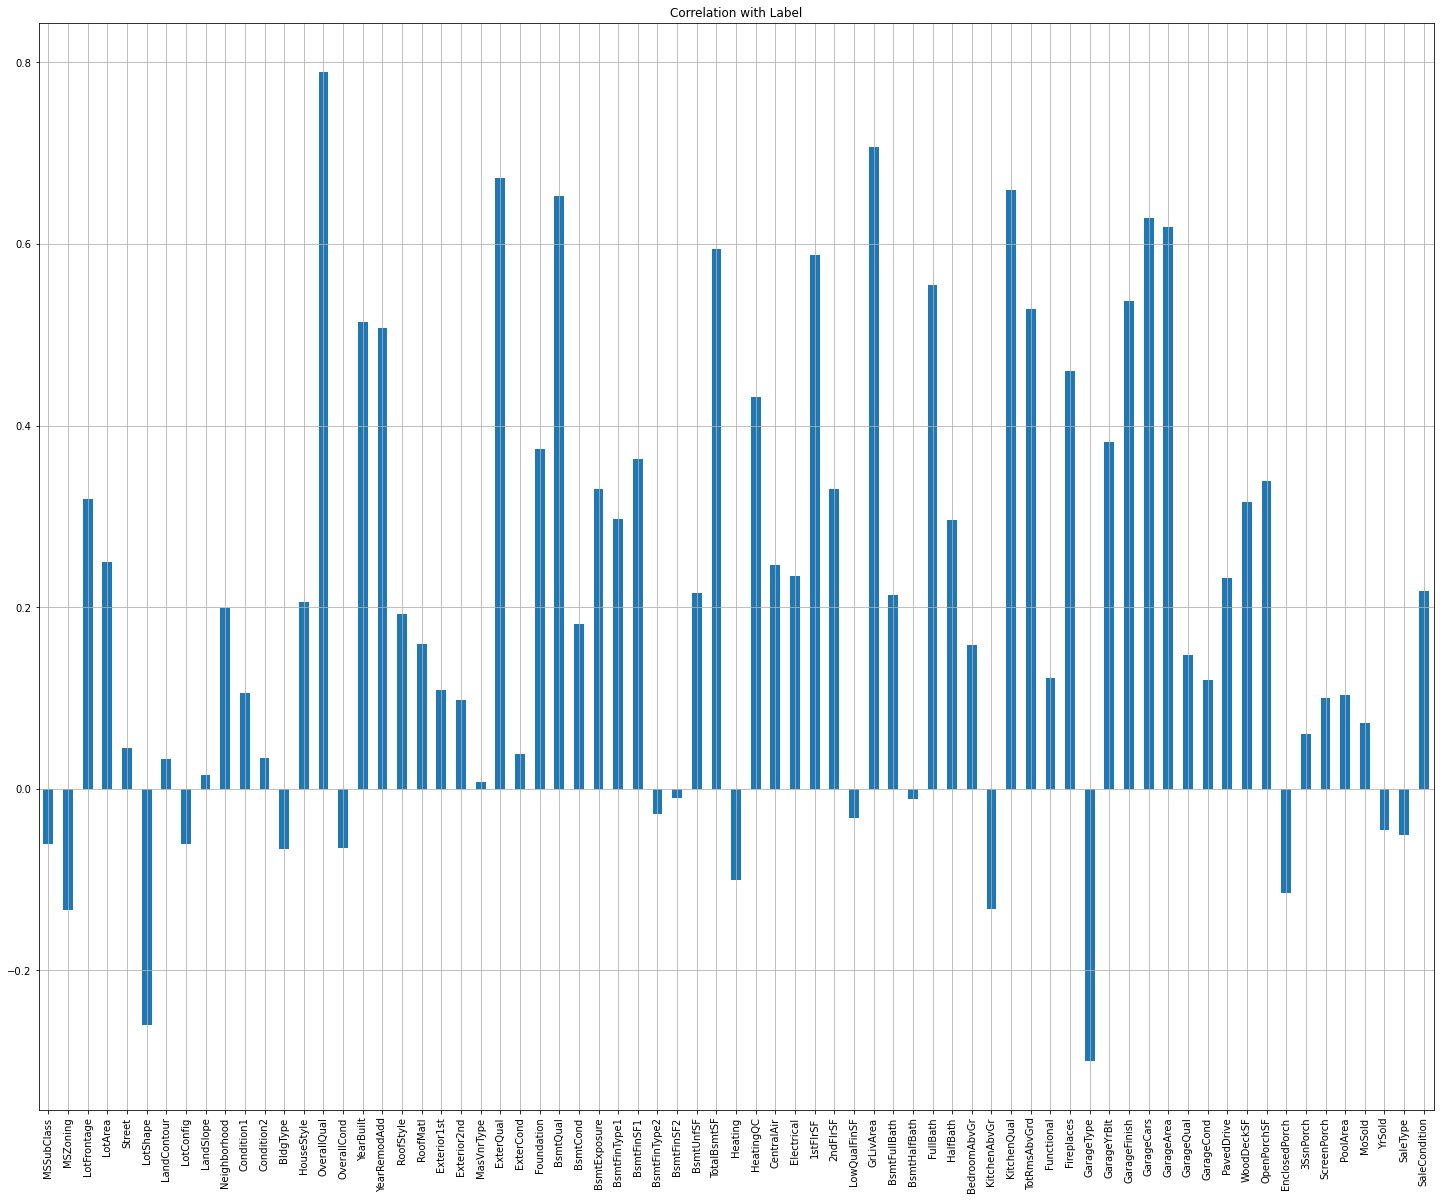

In [25]:
df.drop('SalePrice',axis=1).corrwith(df.SalePrice).plot(kind='bar',grid=True,figsize=(25,20),
                                                     title="Correlation with Label")
plt.show()

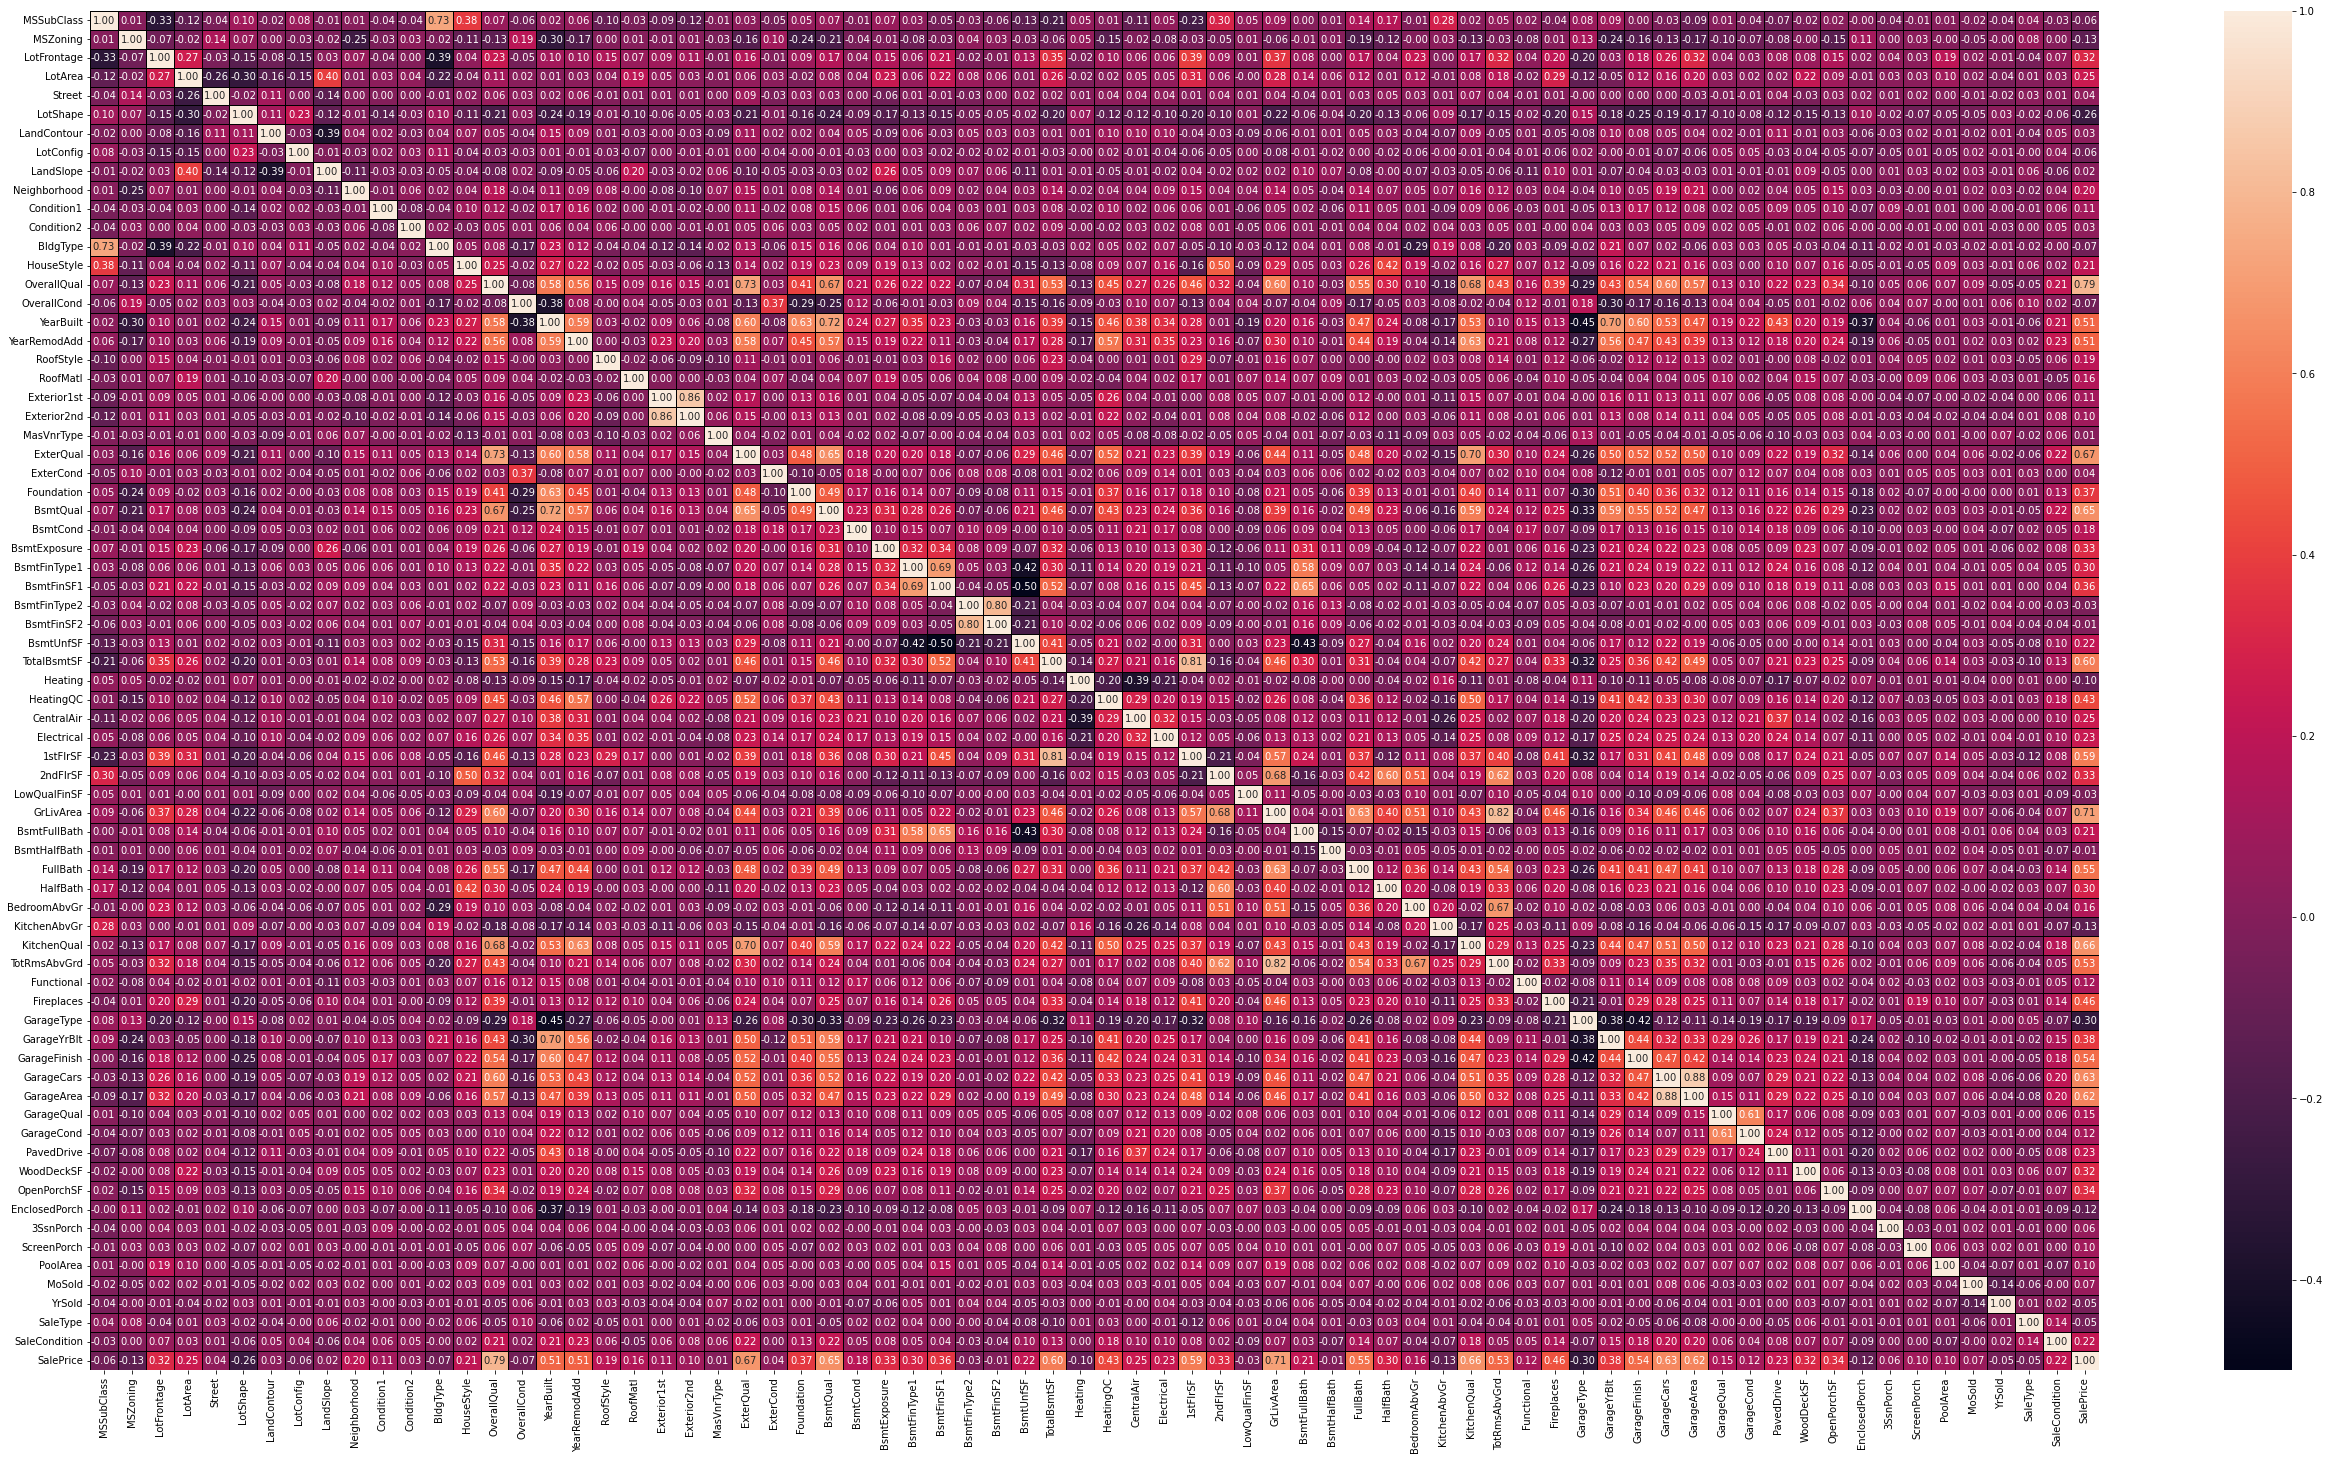

In [26]:
plt.figure(figsize = (45,25))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

Multicollinearity problem does not exist in this database

In [27]:
df = df.drop(['MSSubClass', 'LandContour', 'LotConfig', 'LandSlope', 'Condition2', 'BldgType', 'OverallCond', 'MasVnrType', 'ExterCond', 'BsmtFinType2', 'BsmtHalfBath', '3SsnPorch', 'SaleType'],axis=1)

In [28]:
df_test = df_test.drop(['MSSubClass', 'LandContour', 'LotConfig', 'LandSlope', 'Condition2', 'BldgType', 'OverallCond', 'MasVnrType', 'ExterCond', 'BsmtFinType2', 'BsmtHalfBath', '3SsnPorch', 'SaleType'],axis=1)

In [29]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features           VIF
29       1stFlrSF           inf
30       2ndFlrSF           inf
32      GrLivArea           inf
24    TotalBsmtSF           inf
23      BsmtUnfSF           inf
22     BsmtFinSF2           inf
21     BsmtFinSF1           inf
31   LowQualFinSF           inf
56         YrSold  4.540195e+04
9       YearBuilt  2.845736e+04
10   YearRemodAdd  2.401980e+04
43    GarageYrBlt  1.776206e+04
3          Street  3.383329e+02
48     GarageCond  2.970211e+02
47     GarageQual  2.898943e+02
40     Functional  1.602302e+02
18       BsmtCond  1.223435e+02
15      ExterQual  1.146335e+02
17       BsmtQual  9.206019e+01
39   TotRmsAbvGrd  8.805199e+01
8     OverallQual  8.285724e+01
38    KitchenQual  7.966566e+01
4        LotShape  5.123310e+01
45     GarageCars  3.848843e+01
13    Exterior1st  3.753407e+01
37   KitchenAbvGr  3.660480e+01
26      HeatingQC  3.642024e+01
14    Exterior2nd  3.539224e+01
36   BedroomAbvGr  3.449452e+01
46     GarageArea  3.382601e+01
0        MSZoning  3.085962e+01
34       FullBath  2.868107e+01
27     CentralAir  2.466332e+01
49     PavedDrive  2.241074e+01
28     Electrical  1.816889e+01
25        Heating  1.659333e+01
1     LotFrontage  1.479803e+01
57  SaleCondition  1.434971e+01
44   GarageFinish  1.186735e+01
20   BsmtFinType1  9.951778e+00
16     Foundation  9.798543e+00
6      Condition1  7.160100e+00
55         MoSold  6.943952e+00
7      HouseStyle  6.835092e+00
5    Neighborhood  6.253994e+00
19   BsmtExposure  5.543798e+00
11      RoofStyle  4.723921e+00
12       RoofMatl  4.659850e+00
42     GarageType  4.347149e+00
2         LotArea  3.718594e+00
35       HalfBath  3.651799e+00
33   BsmtFullBath  3.528546e+00
41     Fireplaces  3.254423e+00
50     WoodDeckSF  2.030608e+00
51    OpenPorchSF  1.989357e+00
52  EnclosedPorch  1.455792e+00
53    ScreenPorch  1.238180e+00
54       PoolArea  1.165915e+00

In [30]:
df = df.drop('2ndFlrSF',axis=1)

In [31]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features           VIF
24    TotalBsmtSF           inf
23      BsmtUnfSF           inf
22     BsmtFinSF2           inf
21     BsmtFinSF1           inf
55         YrSold  4.540195e+04
9       YearBuilt  2.845736e+04
10   YearRemodAdd  2.401980e+04
42    GarageYrBlt  1.776206e+04
3          Street  3.383329e+02
47     GarageCond  2.970211e+02
46     GarageQual  2.898943e+02
39     Functional  1.602302e+02
18       BsmtCond  1.223435e+02
15      ExterQual  1.146335e+02
17       BsmtQual  9.206019e+01
38   TotRmsAbvGrd  8.805199e+01
31      GrLivArea  8.290903e+01
8     OverallQual  8.285724e+01
37    KitchenQual  7.966566e+01
29       1stFlrSF  6.041951e+01
4        LotShape  5.123310e+01
44     GarageCars  3.848843e+01
13    Exterior1st  3.753407e+01
36   KitchenAbvGr  3.660480e+01
26      HeatingQC  3.642024e+01
14    Exterior2nd  3.539224e+01
35   BedroomAbvGr  3.449452e+01
45     GarageArea  3.382601e+01
0        MSZoning  3.085962e+01
33       FullBath  2.868107e+01
27     CentralAir  2.466332e+01
48     PavedDrive  2.241074e+01
28     Electrical  1.816889e+01
25        Heating  1.659333e+01
1     LotFrontage  1.479803e+01
56  SaleCondition  1.434971e+01
43   GarageFinish  1.186735e+01
20   BsmtFinType1  9.951778e+00
16     Foundation  9.798543e+00
6      Condition1  7.160100e+00
54         MoSold  6.943952e+00
7      HouseStyle  6.835092e+00
5    Neighborhood  6.253994e+00
19   BsmtExposure  5.543798e+00
11      RoofStyle  4.723921e+00
12       RoofMatl  4.659850e+00
41     GarageType  4.347149e+00
2         LotArea  3.718594e+00
34       HalfBath  3.651799e+00
32   BsmtFullBath  3.528546e+00
40     Fireplaces  3.254423e+00
49     WoodDeckSF  2.030608e+00
50    OpenPorchSF  1.989357e+00
51  EnclosedPorch  1.455792e+00
52    ScreenPorch  1.238180e+00
30   LowQualFinSF  1.217448e+00
53       PoolArea  1.165915e+00

In [32]:
df = df.drop('BsmtFinSF2',axis=1)

In [33]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features           VIF
54         YrSold  45401.945686
9       YearBuilt  28457.364356
10   YearRemodAdd  24019.800952
41    GarageYrBlt  17762.060664
3          Street    338.332910
46     GarageCond    297.021068
45     GarageQual    289.894280
38     Functional    160.230172
18       BsmtCond    122.343522
15      ExterQual    114.633518
17       BsmtQual     92.060186
37   TotRmsAbvGrd     88.051988
30      GrLivArea     82.909027
8     OverallQual     82.857238
23    TotalBsmtSF     80.852785
36    KitchenQual     79.665656
28       1stFlrSF     60.419511
4        LotShape     51.233098
43     GarageCars     38.488430
13    Exterior1st     37.534067
35   KitchenAbvGr     36.604796
25      HeatingQC     36.420243
14    Exterior2nd     35.392238
34   BedroomAbvGr     34.494518
44     GarageArea     33.826012
0        MSZoning     30.859618
32       FullBath     28.681067
26     CentralAir     24.663317
22      BsmtUnfSF     24.443931
47     PavedDrive     22.410738
21     BsmtFinSF1     19.371637
27     Electrical     18.168893
24        Heating     16.593333
1     LotFrontage     14.798030
55  SaleCondition     14.349708
42   GarageFinish     11.867352
20   BsmtFinType1      9.951778
16     Foundation      9.798543
6      Condition1      7.160100
53         MoSold      6.943952
7      HouseStyle      6.835092
5    Neighborhood      6.253994
19   BsmtExposure      5.543798
11      RoofStyle      4.723921
12       RoofMatl      4.659850
40     GarageType      4.347149
2         LotArea      3.718594
33       HalfBath      3.651799
31   BsmtFullBath      3.528546
39     Fireplaces      3.254423
48     WoodDeckSF      2.030608
49    OpenPorchSF      1.989357
50  EnclosedPorch      1.455792
51    ScreenPorch      1.238180
29   LowQualFinSF      1.217448
52       PoolArea      1.165915

In [34]:
df = df.drop('YrSold',axis=1)

In [35]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features           VIF
9       YearBuilt  19611.729589
41    GarageYrBlt  16794.489434
10   YearRemodAdd  15345.049954
3          Street    335.874902
46     GarageCond    296.785219
45     GarageQual    289.119538
38     Functional    158.601234
18       BsmtCond    122.153203
15      ExterQual    114.440082
37   TotRmsAbvGrd     88.051971
17       BsmtQual     84.473484
8     OverallQual     82.416769
23    TotalBsmtSF     80.822132
30      GrLivArea     79.027470
36    KitchenQual     76.523586
28       1stFlrSF     60.124068
4        LotShape     50.523948
43     GarageCars     38.453456
13    Exterior1st     37.492059
35   KitchenAbvGr     36.597693
14    Exterior2nd     35.391505
25      HeatingQC     35.315451
34   BedroomAbvGr     34.467833
44     GarageArea     33.788065
0        MSZoning     30.435548
32       FullBath     26.829055
22      BsmtUnfSF     24.420557
26     CentralAir     24.213074
47     PavedDrive     22.269054
21     BsmtFinSF1     19.366462
27     Electrical     17.677988
24        Heating     16.560869
1     LotFrontage     14.737627
54  SaleCondition     14.308607
42   GarageFinish     11.709541
20   BsmtFinType1      9.886216
16     Foundation      8.901269
6      Condition1      7.145475
53         MoSold      6.943807
7      HouseStyle      6.754879
5    Neighborhood      6.241684
19   BsmtExposure      5.538664
11      RoofStyle      4.720117
12       RoofMatl      4.628670
40     GarageType      4.190612
2         LotArea      3.698429
31   BsmtFullBath      3.526327
33       HalfBath      3.485362
39     Fireplaces      3.165315
48     WoodDeckSF      2.030196
49    OpenPorchSF      1.989341
50  EnclosedPorch      1.391823
51    ScreenPorch      1.218381
29   LowQualFinSF      1.217410
52       PoolArea      1.161408

In [36]:
df = df.drop('GarageYrBlt',axis=1)

In [37]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features           VIF
9       YearBuilt  13188.831115
10   YearRemodAdd  13030.585153
3          Street    335.564134
45     GarageCond    296.488220
44     GarageQual    279.338177
38     Functional    158.574698
18       BsmtCond    122.049159
15      ExterQual    114.284768
37   TotRmsAbvGrd     87.999698
17       BsmtQual     84.265697
8     OverallQual     81.728889
23    TotalBsmtSF     80.574599
30      GrLivArea     78.895800
36    KitchenQual     76.363756
28       1stFlrSF     59.865076
4        LotShape     50.505330
42     GarageCars     37.584922
13    Exterior1st     37.484852
35   KitchenAbvGr     36.518157
14    Exterior2nd     35.349940
25      HeatingQC     35.303753
34   BedroomAbvGr     34.412706
43     GarageArea     33.316693
0        MSZoning     30.351456
32       FullBath     26.818396
22      BsmtUnfSF     24.255470
26     CentralAir     24.073984
46     PavedDrive     21.674553
21     BsmtFinSF1     19.279716
27     Electrical     17.664765
24        Heating     16.556938
1     LotFrontage     14.715535
53  SaleCondition     14.269234
41   GarageFinish     11.680378
20   BsmtFinType1      9.867518
16     Foundation      8.889603
6      Condition1      7.145178
52         MoSold      6.943247
7      HouseStyle      6.717572
5    Neighborhood      6.229348
19   BsmtExposure      5.521139
11      RoofStyle      4.718440
12       RoofMatl      4.628293
40     GarageType      4.143874
2         LotArea      3.679069
31   BsmtFullBath      3.525779
33       HalfBath      3.483897
39     Fireplaces      3.147400
47     WoodDeckSF      2.020811
48    OpenPorchSF      1.984868
49  EnclosedPorch      1.382355
50    ScreenPorch      1.218269
29   LowQualFinSF      1.186909
51       PoolArea      1.159318

In [38]:
df = df.drop('YearRemodAdd',axis=1)

In [39]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features          VIF
9       YearBuilt  1072.888990
3          Street   332.067558
44     GarageCond   296.486474
43     GarageQual   279.062739
37     Functional   158.212002
17       BsmtCond   122.047741
14      ExterQual   114.270624
36   TotRmsAbvGrd    87.829950
16       BsmtQual    81.997740
8     OverallQual    81.697750
22    TotalBsmtSF    80.039181
29      GrLivArea    76.800904
35    KitchenQual    73.460903
27       1stFlrSF    59.852694
4        LotShape    50.289147
41     GarageCars    37.520488
12    Exterior1st    37.483723
34   KitchenAbvGr    36.452794
13    Exterior2nd    35.194714
24      HeatingQC    34.534934
33   BedroomAbvGr    34.154943
42     GarageArea    33.261804
0        MSZoning    30.103451
31       FullBath    26.395918
21      BsmtUnfSF    24.255066
25     CentralAir    24.068764
45     PavedDrive    20.598701
20     BsmtFinSF1    19.277962
26     Electrical    17.496637
23        Heating    16.555233
1     LotFrontage    14.705357
52  SaleCondition    14.224799
40   GarageFinish    11.608248
19   BsmtFinType1     9.866225
15     Foundation     8.352231
6      Condition1     7.124299
51         MoSold     6.943122
7      HouseStyle     6.716839
5    Neighborhood     6.226850
18   BsmtExposure     5.519355
10      RoofStyle     4.715318
11       RoofMatl     4.624241
39     GarageType     4.090309
2         LotArea     3.657197
30   BsmtFullBath     3.525430
32       HalfBath     3.408566
38     Fireplaces     3.143006
46     WoodDeckSF     2.013964
47    OpenPorchSF     1.980856
48  EnclosedPorch     1.357668
49    ScreenPorch     1.213100
28   LowQualFinSF     1.183690
50       PoolArea     1.157984

In [40]:
df = df.drop('YearBuilt',axis=1)

In [41]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features         VIF
43     GarageCond  286.071177
42     GarageQual  265.651583
3          Street  236.430531
36     Functional  143.296720
16       BsmtCond  117.762664
13      ExterQual  112.921037
35   TotRmsAbvGrd   87.829864
8     OverallQual   81.495137
21    TotalBsmtSF   79.999775
15       BsmtQual   79.608430
28      GrLivArea   76.118635
34    KitchenQual   73.456543
26       1stFlrSF   59.474637
4        LotShape   45.126572
40     GarageCars   37.518103
11    Exterior1st   37.481908
33   KitchenAbvGr   35.568972
12    Exterior2nd   35.172218
23      HeatingQC   34.167964
32   BedroomAbvGr   33.993815
41     GarageArea   33.183669
0        MSZoning   29.852756
30       FullBath   26.393312
20      BsmtUnfSF   24.254160
24     CentralAir   23.833525
44     PavedDrive   20.547042
19     BsmtFinSF1   19.254983
25     Electrical   17.495340
22        Heating   16.152348
1     LotFrontage   14.650559
51  SaleCondition   14.205859
39   GarageFinish   11.578157
18   BsmtFinType1    9.850581
14     Foundation    8.347192
6      Condition1    7.047599
50         MoSold    6.874696
7      HouseStyle    6.608453
5    Neighborhood    6.199744
17   BsmtExposure    5.517187
9       RoofStyle    4.711593
10       RoofMatl    4.623974
38     GarageType    4.025550
29   BsmtFullBath    3.525403
2         LotArea    3.436552
31       HalfBath    3.393914
37     Fireplaces    3.133220
45     WoodDeckSF    2.010906
46    OpenPorchSF    1.972854
47  EnclosedPorch    1.357561
48    ScreenPorch    1.213055
27   LowQualFinSF    1.183557
49       PoolArea    1.156977

In [42]:
df = df.drop('Street',axis=1)

In [43]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features         VIF
42     GarageCond  282.341690
41     GarageQual  260.511599
35     Functional  136.561908
15       BsmtCond  116.288093
12      ExterQual  110.584506
34   TotRmsAbvGrd   87.797555
7     OverallQual   81.156875
20    TotalBsmtSF   79.921705
14       BsmtQual   79.384949
27      GrLivArea   76.116133
33    KitchenQual   73.371320
25       1stFlrSF   59.278605
3        LotShape   44.313572
39     GarageCars   37.518008
10    Exterior1st   37.452766
11    Exterior2nd   35.168412
32   KitchenAbvGr   34.839108
22      HeatingQC   34.047161
31   BedroomAbvGr   33.811048
40     GarageArea   32.991564
0        MSZoning   27.956171
29       FullBath   26.356662
19      BsmtUnfSF   24.226848
23     CentralAir   23.674065
43     PavedDrive   20.526819
18     BsmtFinSF1   19.246980
24     Electrical   17.470635
21        Heating   15.885618
1     LotFrontage   14.617755
50  SaleCondition   14.192377
38   GarageFinish   11.573912
17   BsmtFinType1    9.848954
13     Foundation    8.340279
5      Condition1    7.017629
49         MoSold    6.859481
6      HouseStyle    6.587655
4    Neighborhood    6.173700
16   BsmtExposure    5.514686
8       RoofStyle    4.711575
9        RoofMatl    4.605748
37     GarageType    3.989731
28   BsmtFullBath    3.517350
30       HalfBath    3.391908
2         LotArea    3.335098
36     Fireplaces    3.133009
44     WoodDeckSF    2.008639
45    OpenPorchSF    1.972835
46  EnclosedPorch    1.352757
47    ScreenPorch    1.212840
26   LowQualFinSF    1.183550
48       PoolArea    1.156272

In [44]:
df = df.drop('GarageCond',axis=1)

In [45]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features         VIF
41     GarageQual  144.089498
35     Functional  134.694874
15       BsmtCond  115.023985
12      ExterQual  110.461879
34   TotRmsAbvGrd   87.706239
7     OverallQual   80.847590
20    TotalBsmtSF   79.743042
14       BsmtQual   78.580431
27      GrLivArea   76.108475
33    KitchenQual   73.314236
25       1stFlrSF   58.996782
3        LotShape   43.898584
10    Exterior1st   37.452752
39     GarageCars   37.385368
11    Exterior2nd   35.104070
32   KitchenAbvGr   34.787429
22      HeatingQC   33.992243
31   BedroomAbvGr   33.575366
40     GarageArea   32.980581
0        MSZoning   27.822176
29       FullBath   26.333527
19      BsmtUnfSF   24.214476
23     CentralAir   23.429702
42     PavedDrive   20.244037
18     BsmtFinSF1   19.242801
24     Electrical   17.297828
21        Heating   15.677962
1     LotFrontage   14.616714
49  SaleCondition   14.186895
38   GarageFinish   11.573590
17   BsmtFinType1    9.848916
13     Foundation    8.333272
5      Condition1    6.994303
48         MoSold    6.854339
6      HouseStyle    6.584720
4    Neighborhood    6.153883
16   BsmtExposure    5.514405
8       RoofStyle    4.710135
9        RoofMatl    4.586994
37     GarageType    3.981711
28   BsmtFullBath    3.516618
30       HalfBath    3.380195
2         LotArea    3.332143
36     Fireplaces    3.128742
43     WoodDeckSF    2.002213
44    OpenPorchSF    1.972253
45  EnclosedPorch    1.352711
46    ScreenPorch    1.212317
26   LowQualFinSF    1.183176
47       PoolArea    1.154937

In [46]:
df = df.drop('Functional',axis=1)

In [47]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features         VIF
40     GarageQual  131.437249
12      ExterQual  110.419946
15       BsmtCond  107.434134
34   TotRmsAbvGrd   87.483417
7     OverallQual   80.178635
20    TotalBsmtSF   79.741356
14       BsmtQual   78.460126
27      GrLivArea   75.528338
33    KitchenQual   72.993139
25       1stFlrSF   57.741814
3        LotShape   42.624430
10    Exterior1st   37.419865
38     GarageCars   37.384015
11    Exterior2nd   35.069476
32   KitchenAbvGr   33.993187
22      HeatingQC   33.986006
31   BedroomAbvGr   33.471159
39     GarageArea   32.932321
0        MSZoning   27.683538
29       FullBath   26.267871
19      BsmtUnfSF   24.041706
23     CentralAir   23.417778
41     PavedDrive   20.183822
18     BsmtFinSF1   19.119126
24     Electrical   17.282860
21        Heating   15.632727
1     LotFrontage   14.512491
48  SaleCondition   14.177162
37   GarageFinish   11.494947
17   BsmtFinType1    9.810709
13     Foundation    8.332223
5      Condition1    6.993855
47         MoSold    6.818256
6      HouseStyle    6.584626
4    Neighborhood    6.137374
16   BsmtExposure    5.511152
8       RoofStyle    4.702951
9        RoofMatl    4.586327
36     GarageType    3.969795
28   BsmtFullBath    3.513341
30       HalfBath    3.380157
2         LotArea    3.312042
35     Fireplaces    3.125301
42     WoodDeckSF    2.001728
43    OpenPorchSF    1.971750
44  EnclosedPorch    1.347938
45    ScreenPorch    1.212284
26   LowQualFinSF    1.183023
46       PoolArea    1.154113

In [48]:
df = df.drop('GarageQual',axis=1)

In [49]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features         VIF
12      ExterQual  110.114642
15       BsmtCond   99.846265
34   TotRmsAbvGrd   87.355538
7     OverallQual   80.164254
20    TotalBsmtSF   79.696851
14       BsmtQual   77.311351
27      GrLivArea   74.801475
33    KitchenQual   72.680387
25       1stFlrSF   57.341717
3        LotShape   40.561941
10    Exterior1st   37.189013
38     GarageCars   36.352364
11    Exterior2nd   35.067663
22      HeatingQC   33.910153
31   BedroomAbvGr   32.820178
32   KitchenAbvGr   32.728187
39     GarageArea   32.381782
0        MSZoning   27.259373
29       FullBath   26.267757
19      BsmtUnfSF   23.951264
23     CentralAir   23.295595
40     PavedDrive   19.781767
18     BsmtFinSF1   19.101132
24     Electrical   17.136977
21        Heating   15.458693
1     LotFrontage   14.501021
47  SaleCondition   14.093919
37   GarageFinish   11.470030
17   BsmtFinType1    9.786595
13     Foundation    8.328892
5      Condition1    6.967230
46         MoSold    6.812597
6      HouseStyle    6.583851
4    Neighborhood    6.135234
16   BsmtExposure    5.509863
8       RoofStyle    4.683384
9        RoofMatl    4.528563
36     GarageType    3.965584
28   BsmtFullBath    3.480101
30       HalfBath    3.373776
2         LotArea    3.300684
35     Fireplaces    3.114166
41     WoodDeckSF    1.999422
42    OpenPorchSF    1.969445
43  EnclosedPorch    1.347497
44    ScreenPorch    1.212179
26   LowQualFinSF    1.158368
45       PoolArea    1.151637

In [50]:
df = df.drop('ExterQual',axis=1)

In [51]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features        VIF
14       BsmtCond  99.180116
33   TotRmsAbvGrd  87.255825
19    TotalBsmtSF  79.597347
13       BsmtQual  75.461466
7     OverallQual  75.240826
26      GrLivArea  74.796850
32    KitchenQual  65.898149
24       1stFlrSF  57.285760
3        LotShape  40.553340
10    Exterior1st  37.185559
37     GarageCars  36.279098
11    Exterior2nd  35.063633
21      HeatingQC  33.011582
30   BedroomAbvGr  32.712302
31   KitchenAbvGr  32.686248
38     GarageArea  32.348614
0        MSZoning  27.141929
28       FullBath  26.257243
18      BsmtUnfSF  23.928814
22     CentralAir  23.251334
39     PavedDrive  19.695575
17     BsmtFinSF1  19.098235
23     Electrical  17.093465
20        Heating  15.339826
1     LotFrontage  14.495394
46  SaleCondition  14.044672
36   GarageFinish  11.406623
16   BsmtFinType1   9.776196
12     Foundation   8.135941
5      Condition1   6.966824
45         MoSold   6.806589
6      HouseStyle   6.553081
4    Neighborhood   6.129550
15   BsmtExposure   5.506895
8       RoofStyle   4.670765
9        RoofMatl   4.526293
35     GarageType   3.960711
27   BsmtFullBath   3.479916
29       HalfBath   3.373207
2         LotArea   3.300348
34     Fireplaces   3.109493
40     WoodDeckSF   1.997094
41    OpenPorchSF   1.963011
42  EnclosedPorch   1.347487
43    ScreenPorch   1.210785
25   LowQualFinSF   1.158275
44       PoolArea   1.151314

In [52]:
df = df.drop('BsmtCond',axis=1)

In [53]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features        VIF
32   TotRmsAbvGrd  87.230126
18    TotalBsmtSF  79.302581
7     OverallQual  74.590958
25      GrLivArea  73.873506
13       BsmtQual  72.253406
31    KitchenQual  65.706248
23       1stFlrSF  57.187234
3        LotShape  38.970365
10    Exterior1st  37.185317
36     GarageCars  36.028450
11    Exterior2nd  35.035089
20      HeatingQC  32.951318
29   BedroomAbvGr  32.328202
37     GarageArea  32.328161
30   KitchenAbvGr  31.705304
0        MSZoning  26.548234
27       FullBath  26.252062
17      BsmtUnfSF  23.672198
21     CentralAir  22.561393
38     PavedDrive  19.329194
16     BsmtFinSF1  18.835783
22     Electrical  16.854826
19        Heating  14.969380
1     LotFrontage  14.435927
45  SaleCondition  14.033642
35   GarageFinish  11.404697
15   BsmtFinType1   9.699907
12     Foundation   8.123853
5      Condition1   6.926448
44         MoSold   6.763248
6      HouseStyle   6.543287
4    Neighborhood   6.129261
14   BsmtExposure   5.505759
8       RoofStyle   4.665962
9        RoofMatl   4.487781
34     GarageType   3.911960
26   BsmtFullBath   3.478162
28       HalfBath   3.372625
2         LotArea   3.267361
33     Fireplaces   3.109192
39     WoodDeckSF   1.996782
40    OpenPorchSF   1.962820
41  EnclosedPorch   1.346561
42    ScreenPorch   1.210496
24   LowQualFinSF   1.157797
43       PoolArea   1.151291

In [54]:
df = df.drop('TotRmsAbvGrd',axis=1)

In [55]:
x = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

Features        VIF
18    TotalBsmtSF  78.815996
7     OverallQual  74.531792
13       BsmtQual  72.239993
31    KitchenQual  65.319169
25      GrLivArea  57.655733
23       1stFlrSF  56.977569
3        LotShape  38.966749
10    Exterior1st  37.124683
35     GarageCars  35.993278
11    Exterior2nd  35.017673
20      HeatingQC  32.951234
36     GarageArea  32.328128
30   KitchenAbvGr  29.674495
0        MSZoning  26.536664
27       FullBath  26.227105
29   BedroomAbvGr  24.950070
17      BsmtUnfSF  23.647630
21     CentralAir  22.551271
37     PavedDrive  19.225997
16     BsmtFinSF1  18.835754
22     Electrical  16.844984
19        Heating  14.967417
1     LotFrontage  14.410534
44  SaleCondition  14.030802
34   GarageFinish  11.371012
15   BsmtFinType1   9.691414
12     Foundation   8.096475
5      Condition1   6.892399
43         MoSold   6.755127
6      HouseStyle   6.533698
4    Neighborhood   6.129134
14   BsmtExposure   5.505741
8       RoofStyle   4.648803
9        RoofMatl   4.477401
33     GarageType   3.910490
26   BsmtFullBath   3.476200
28       HalfBath   3.372146
2         LotArea   3.258947
32     Fireplaces   3.104920
38     WoodDeckSF   1.996774
39    OpenPorchSF   1.962794
40  EnclosedPorch   1.342787
41    ScreenPorch   1.209880
24   LowQualFinSF   1.156854
42       PoolArea   1.142631

Deleting these columns one by one to reduce VIF from the dataset.

- '2ndFlrSF', 'BsmtFinSF2', 'YrSold', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'Street', 'GarageCond', 'Functional', 'GarageQual', 'ExterQual', 'BsmtCond' and 'TotRmsAbvGrd'

In [56]:
df_test = df_test.drop(['2ndFlrSF', 'BsmtFinSF2', 'YrSold', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'Street', 'GarageCond', 'Functional', 'GarageQual', 'ExterQual', 'BsmtCond', 'TotRmsAbvGrd'],axis=1)

In [57]:
df

MSZoning  LotFrontage  LotArea  LotShape  Neighborhood  Condition1  \
0          3.0         60.0     4928         3          13.0         2.0   
1          3.0         95.0    15865         3          12.0         2.0   
2          3.0         92.0     9920         3          15.0         2.0   
3          3.0        105.0    11751         3          14.0         2.0   
4          3.0         60.0    16635         3          14.0         2.0   
...        ...          ...      ...       ...           ...         ...   
1163       3.0         60.0     9819         3          19.0         2.0   
1164       3.0         67.0     8777         4           7.0         1.0   
1165       3.0         24.0     2280         4          13.0         2.0   
1166       0.0         50.0     8500         4           9.0         1.0   
1167       3.0         60.0     7861         3           8.0         2.0   

      HouseStyle  OverallQual  RoofStyle  RoofMatl  ...  GarageArea  \
0            2.0            6        1.0       1.0  ...         440   
1            2.0            8        0.0       5.0  ...         621   
2            5.0            7        1.0       1.0  ...         455   
3            2.0            6        3.0       1.0  ...         546   
4            2.0            6        1.0       1.0  ...         529   
...          ...          ...        ...       ...  ...         ...   
1163         2.0            5        1.0       1.0  ...         280   
1164         2.0            4        1.0       1.0  ...         520   
1165         5.0            6        1.0       1.0  ...         440   
1166         5.0            4        2.0       1.0  ...         250   
1167         5.0            6        1.0       1.0  ...         393   

      PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
0              2           0          205              0            0   
1              2          81          207              0          224   
2              2         180          130              0            0   
3              2           0          122              0            0   
4              2         240            0              0            0   
...          ...         ...          ...            ...          ...   
1163           2           0            0              0            0   
1164           0           0           96              0            0   
1165           2          87            0              0            0   
1166           0           0           54            172            0   
1167           2         100           75              0            0   

      PoolArea  MoSold  SaleCondition  SalePrice  
0            0       2            4.0     128000  
1            0      10            4.0     268000  
2            0       6            4.0     269790  
3            0       1            4.0     190000  
4            0       6            4.0     215000  
...        ...     ...            ...        ...  
1163         0       2            4.0     122000  
1164         0       5            4.0     108000  
1165         0       7            4.0     148500  
1166         0       7            4.0      40000  
1167         0       6            4.0     183200  

[1168 rows x 46 columns]

In [58]:
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']

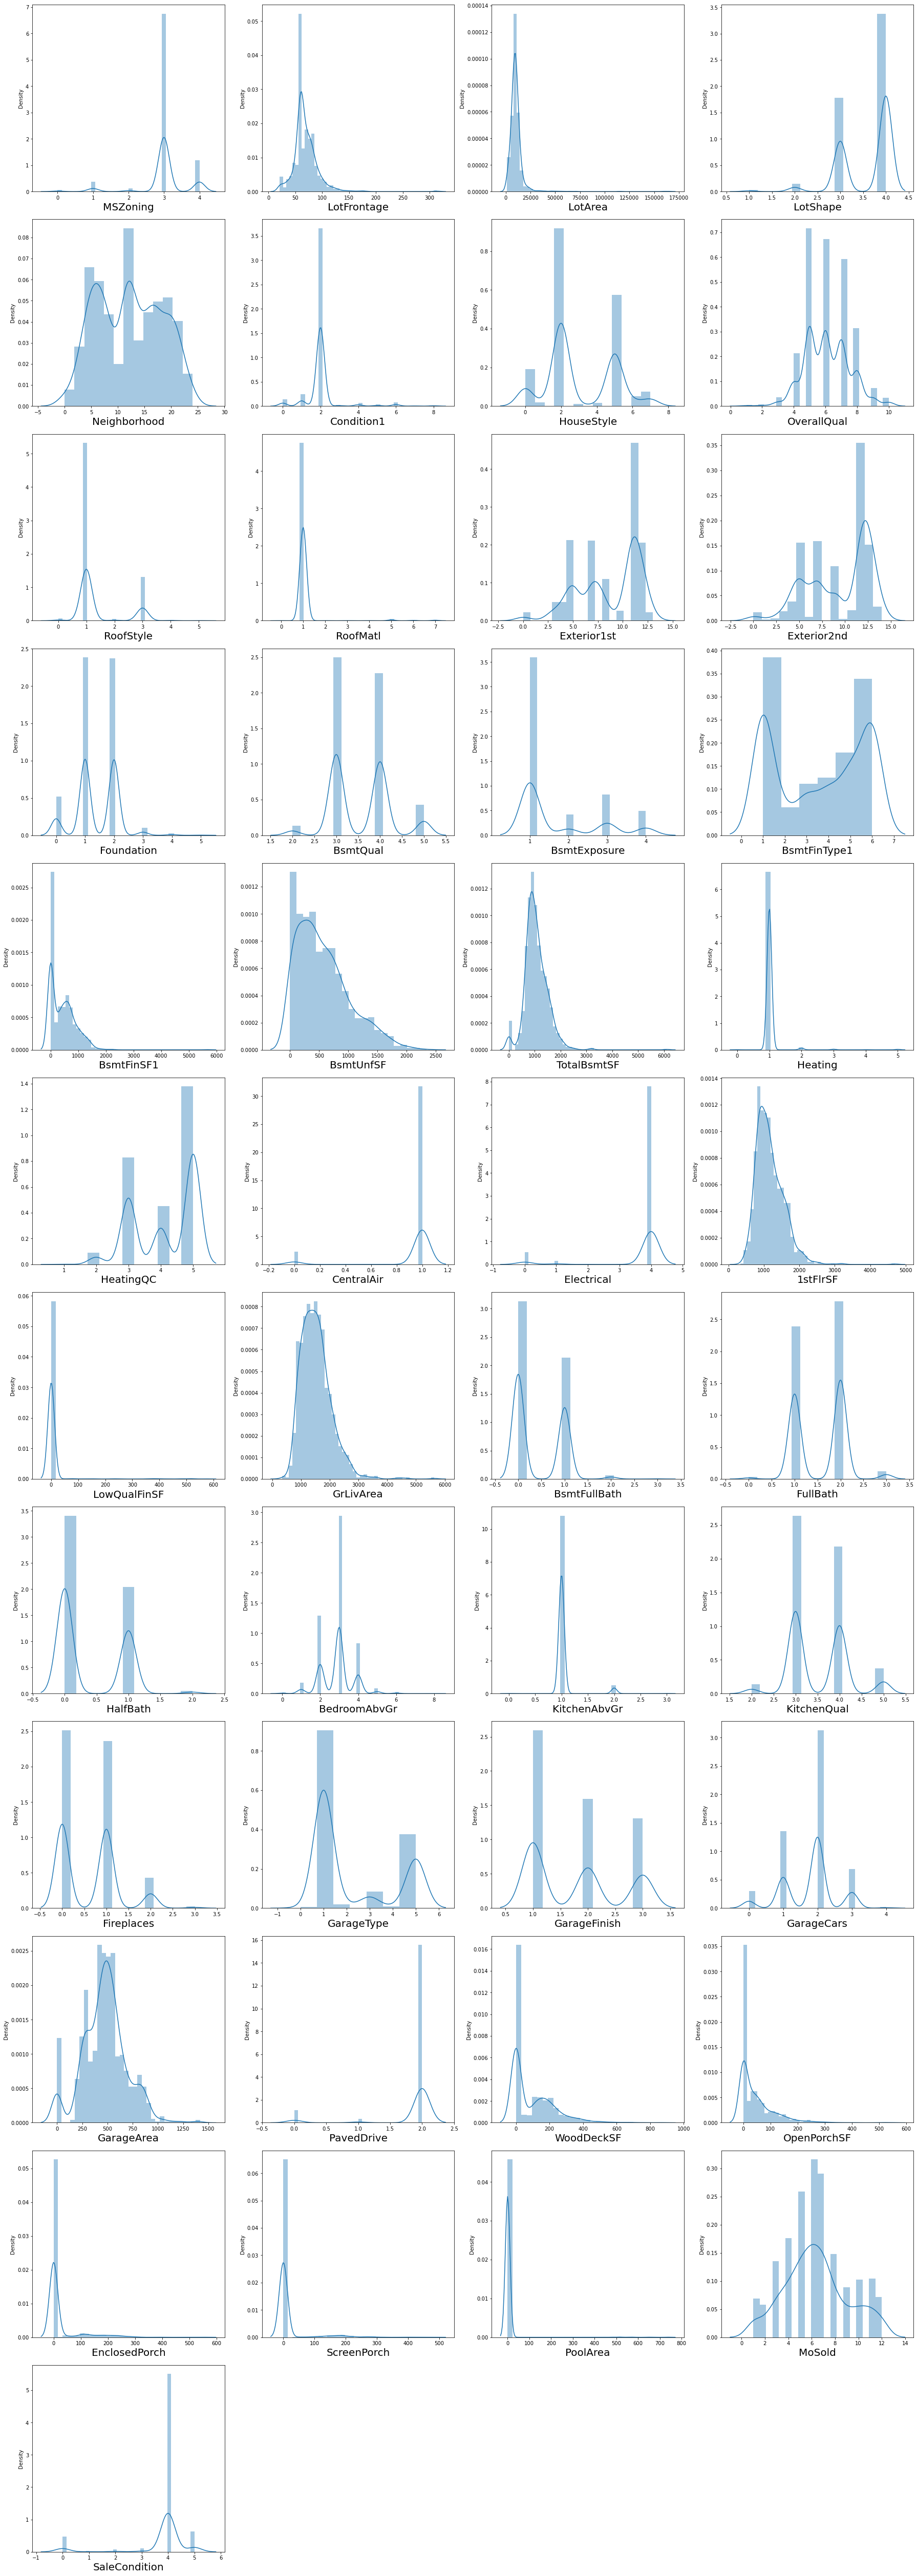

In [59]:
plt.figure(figsize=(25,70), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 48:
        ax = plt.subplot(12,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [60]:
for i in df.columns:
    a = df[i].skew()
    print(i,'=',a)

MSZoning = -1.7967850975188662
LotFrontage = 2.815783305691548
LotArea = 10.659284548299626
LotShape = -1.2351710218067382
Neighborhood = 0.043735292946020986
Condition1 = 3.008289061615448
HouseStyle = 0.2856801863402313
OverallQual = 0.1750824992845271
RoofStyle = 1.4985601535327249
RoofMatl = 7.577352367722009
Exterior1st = -0.6128162942734297
Exterior2nd = -0.5923490009398771
Foundation = -0.0027614041954660954
BsmtQual = 0.31370585003008444
BsmtExposure = 1.1930193943560572
BsmtFinType1 = -0.11267523049928818
BsmtFinSF1 = 1.8716059327957582
BsmtUnfSF = 0.9090571206651619
TotalBsmtSF = 1.7445908855423957
Heating = 10.103609435818715
HeatingQC = -0.5096959905472555
CentralAir = -3.4751876578509306
Electrical = -3.104209373520368
1stFlrSF = 1.5137072331415693
LowQualFinSF = 8.666142302049042
GrLivArea = 1.4499515426476701
BsmtFullBath = 0.6271059162466773
FullBath = 0.05780870861471475
HalfBath = 0.6564917514090118
BedroomAbvGr = 0.2438552945621391
KitchenAbvGr = 4.365258908133523
Ki

Not considering skewness of categorical data columns
- LotFrontage, LotArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 2ndFlrSF, LowQualFinSF, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch and PoolArea has skewness

In [61]:
df.describe()

MSZoning  LotFrontage        LotArea     LotShape  Neighborhood  \
count  1168.000000  1168.000000    1168.000000  1168.000000   1168.000000   
mean      3.013699    68.975171   10484.749144     3.595890     12.145548   
std       0.633120    22.836520    8957.442311     0.571578      6.010364   
min       0.000000    21.000000    1300.000000     1.000000      0.000000   
25%       3.000000    60.000000    7621.500000     3.000000      7.000000   
50%       3.000000    64.000000    9522.500000     4.000000     12.000000   
75%       3.000000    79.250000   11515.500000     4.000000     17.000000   
max       4.000000   313.000000  164660.000000     4.000000     24.000000   

        Condition1   HouseStyle  OverallQual    RoofStyle     RoofMatl  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean      2.032534     3.043664     6.104452     1.402397     1.086473  ...   
std       0.871703     1.898625     1.390153     0.832539     0.642848  ...   
min       0.000000     0.000000     1.000000     0.000000     0.000000  ...   
25%       2.000000     2.000000     5.000000     1.000000     1.000000  ...   
50%       2.000000     2.000000     6.000000     1.000000     1.000000  ...   
75%       2.000000     5.000000     7.000000     1.000000     1.000000  ...   
max       8.000000     7.000000    10.000000     5.000000     7.000000  ...   

        GarageArea   PavedDrive   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean    476.860445     1.853596    96.206336    46.559932      23.015411   
std     214.466769     0.501894   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%     338.000000     2.000000     0.000000     0.000000       0.000000   
50%     480.000000     2.000000     0.000000    24.000000       0.000000   
75%     576.000000     2.000000   171.000000    70.000000       0.000000   
max    1418.000000     2.000000   857.000000   547.000000     552.000000   

       ScreenPorch     PoolArea       MoSold  SaleCondition      SalePrice  
count  1168.000000  1168.000000  1168.000000    1168.000000    1168.000000  
mean     15.051370     3.448630     6.344178       3.768836  181477.005993  
std      55.080816    44.896939     2.686352       1.112208   79105.586863  
min       0.000000     0.000000     1.000000       0.000000   34900.000000  
25%       0.000000     0.000000     5.000000       4.000000  130375.000000  
50%       0.000000     0.000000     6.000000       4.000000  163995.000000  
75%       0.000000     0.000000     8.000000       4.000000  215000.000000  
max     480.000000   738.000000    12.000000       5.000000  755000.000000  

[8 rows x 46 columns]

Database is ready to remove outliers if exist 

In [62]:
x = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

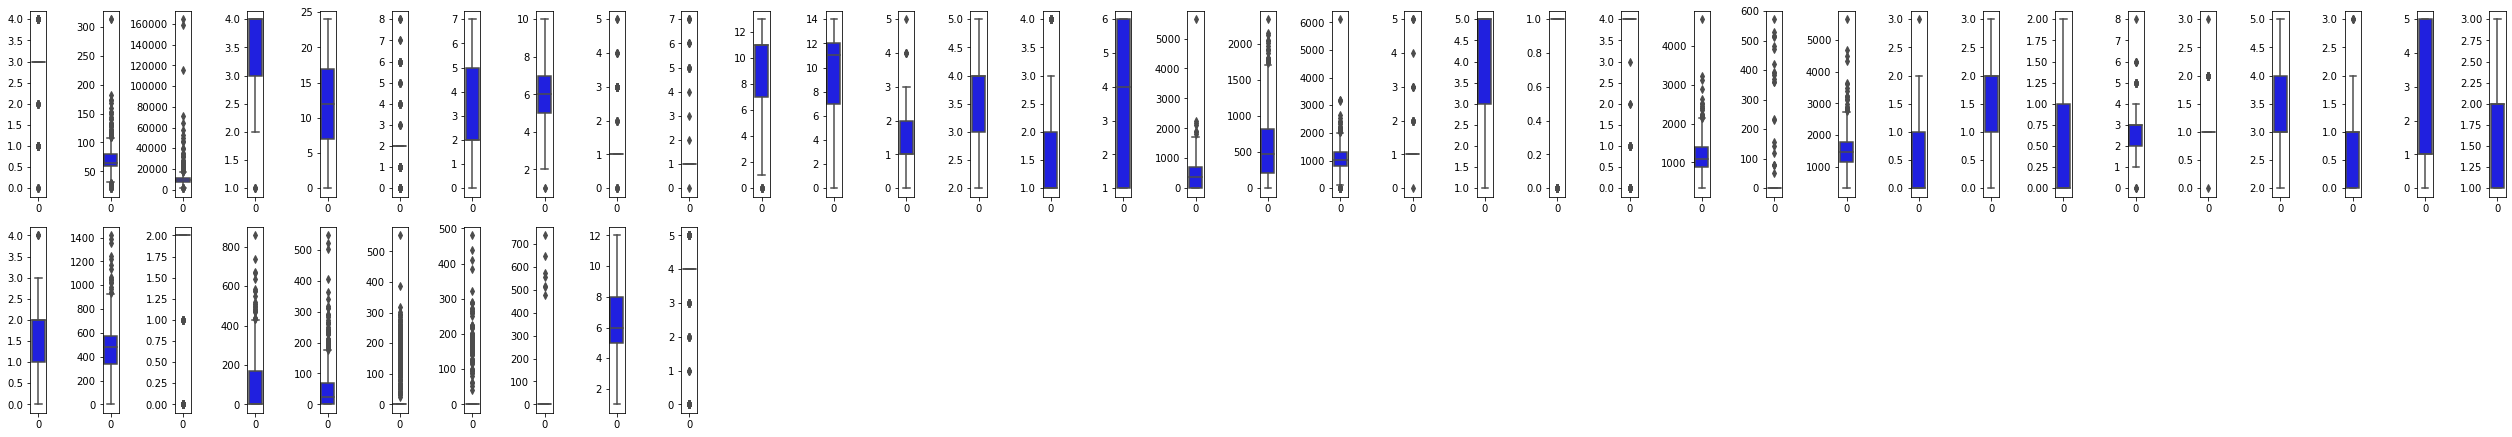

In [63]:
a = x.columns.values
col = 35
row = 30
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

LotFrontage, LotArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch and PoolArea Column has outliers

In [64]:
df.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MoSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [65]:
old_data = (df.shape)[0]

In [66]:
q1 = df['LotFrontage'].quantile(0.25)
q3 = df['LotFrontage'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['LotFrontage'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['LotFrontage'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from LotFrontage

In [67]:
q1 = df['LotArea'].quantile(0.25)
q3 = df['LotArea'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['LotArea'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['LotArea'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from LotArea

In [68]:
q1 = df['BsmtFinSF1'].quantile(0.25)
q3 = df['BsmtFinSF1'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['BsmtFinSF1'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['BsmtFinSF1'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from BsmtFinSF1

In [69]:
q1 = df['BsmtUnfSF'].quantile(0.25)
q3 = df['BsmtUnfSF'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['BsmtUnfSF'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['BsmtUnfSF'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from BsmtUnfSF

In [70]:
q1 = df['TotalBsmtSF'].quantile(0.25)
q3 = df['TotalBsmtSF'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['TotalBsmtSF'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['TotalBsmtSF'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from TotalBsmtSF

In [71]:
q1 = df['1stFlrSF'].quantile(0.25)
q3 = df['1stFlrSF'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['1stFlrSF'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['1stFlrSF'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from 1stFlrSF

In [72]:
q1 = df['LowQualFinSF'].quantile(0.25)
q3 = df['LowQualFinSF'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['LowQualFinSF'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['LowQualFinSF'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from LowQualFinSF

In [73]:
q1 = df['GrLivArea'].quantile(0.25)
q3 = df['GrLivArea'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['GrLivArea'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['GrLivArea'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from GrLivArea

In [74]:
q1 = df['GarageArea'].quantile(0.25)
q3 = df['GarageArea'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['GarageArea'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['GarageArea'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from GarageArea

In [75]:
q1 = df['WoodDeckSF'].quantile(0.25)
q3 = df['WoodDeckSF'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['WoodDeckSF'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['WoodDeckSF'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from WoodDeckSF

In [76]:
q1 = df['OpenPorchSF'].quantile(0.25)
q3 = df['OpenPorchSF'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['OpenPorchSF'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['OpenPorchSF'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from OpenPorchSF

In [77]:
q1 = df['EnclosedPorch'].quantile(0.25)
q3 = df['EnclosedPorch'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['EnclosedPorch'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['EnclosedPorch'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1) 

Removed outliers from EnclosedPorch

In [78]:
q1 = df['ScreenPorch'].quantile(0.25)
q3 = df['ScreenPorch'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['ScreenPorch'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['ScreenPorch'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from ScreenPorch

In [79]:
q1 = df['PoolArea'].quantile(0.25)
q3 = df['PoolArea'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['PoolArea'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['PoolArea'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from PoolArea

In [80]:
new_data = (df.shape)[0]

In [81]:
data_loss = old_data - new_data
print('Data Loss -',data_loss)

Data Loss - 502


Data Loss is very huge

In [82]:
x = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

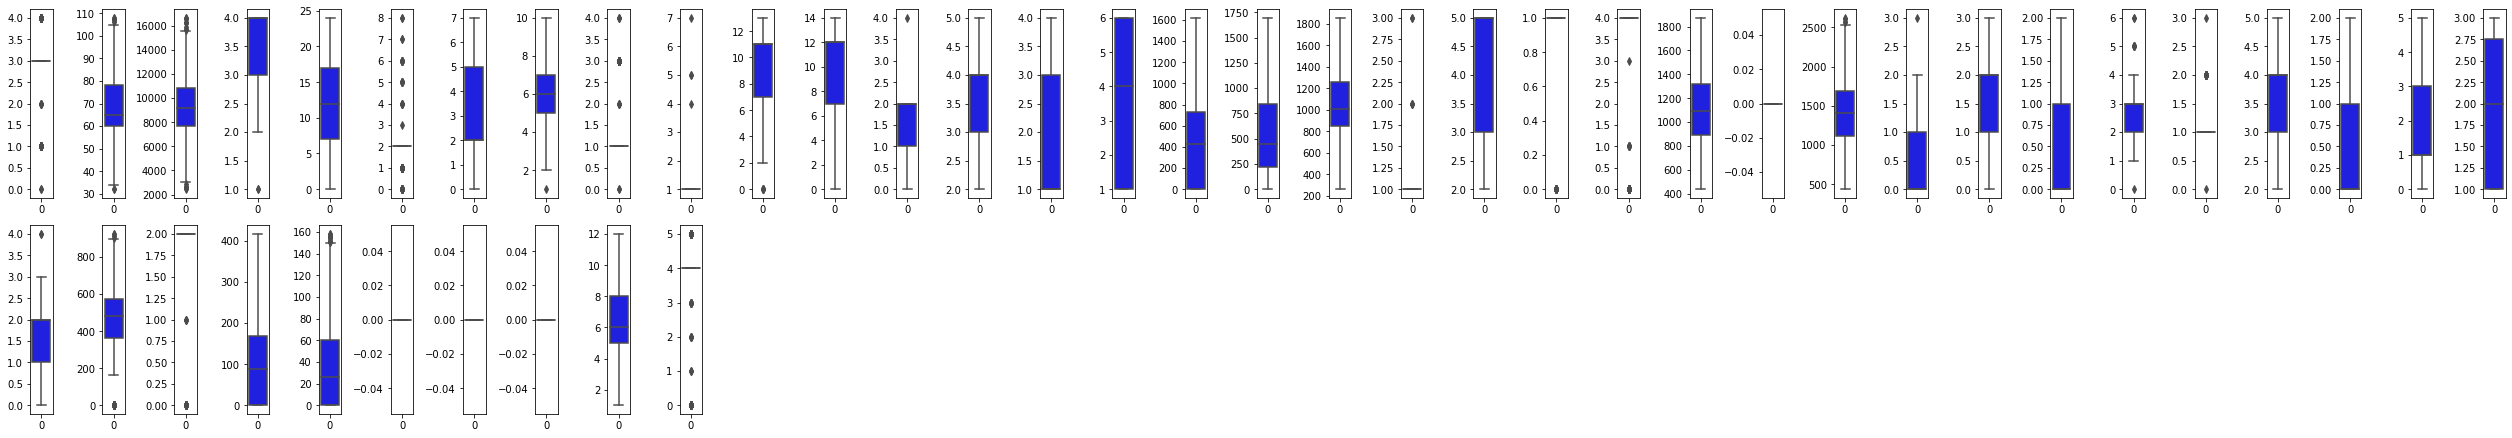

In [83]:
a = x.columns.values
col = 35
row = 30
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Cleared all the outliers

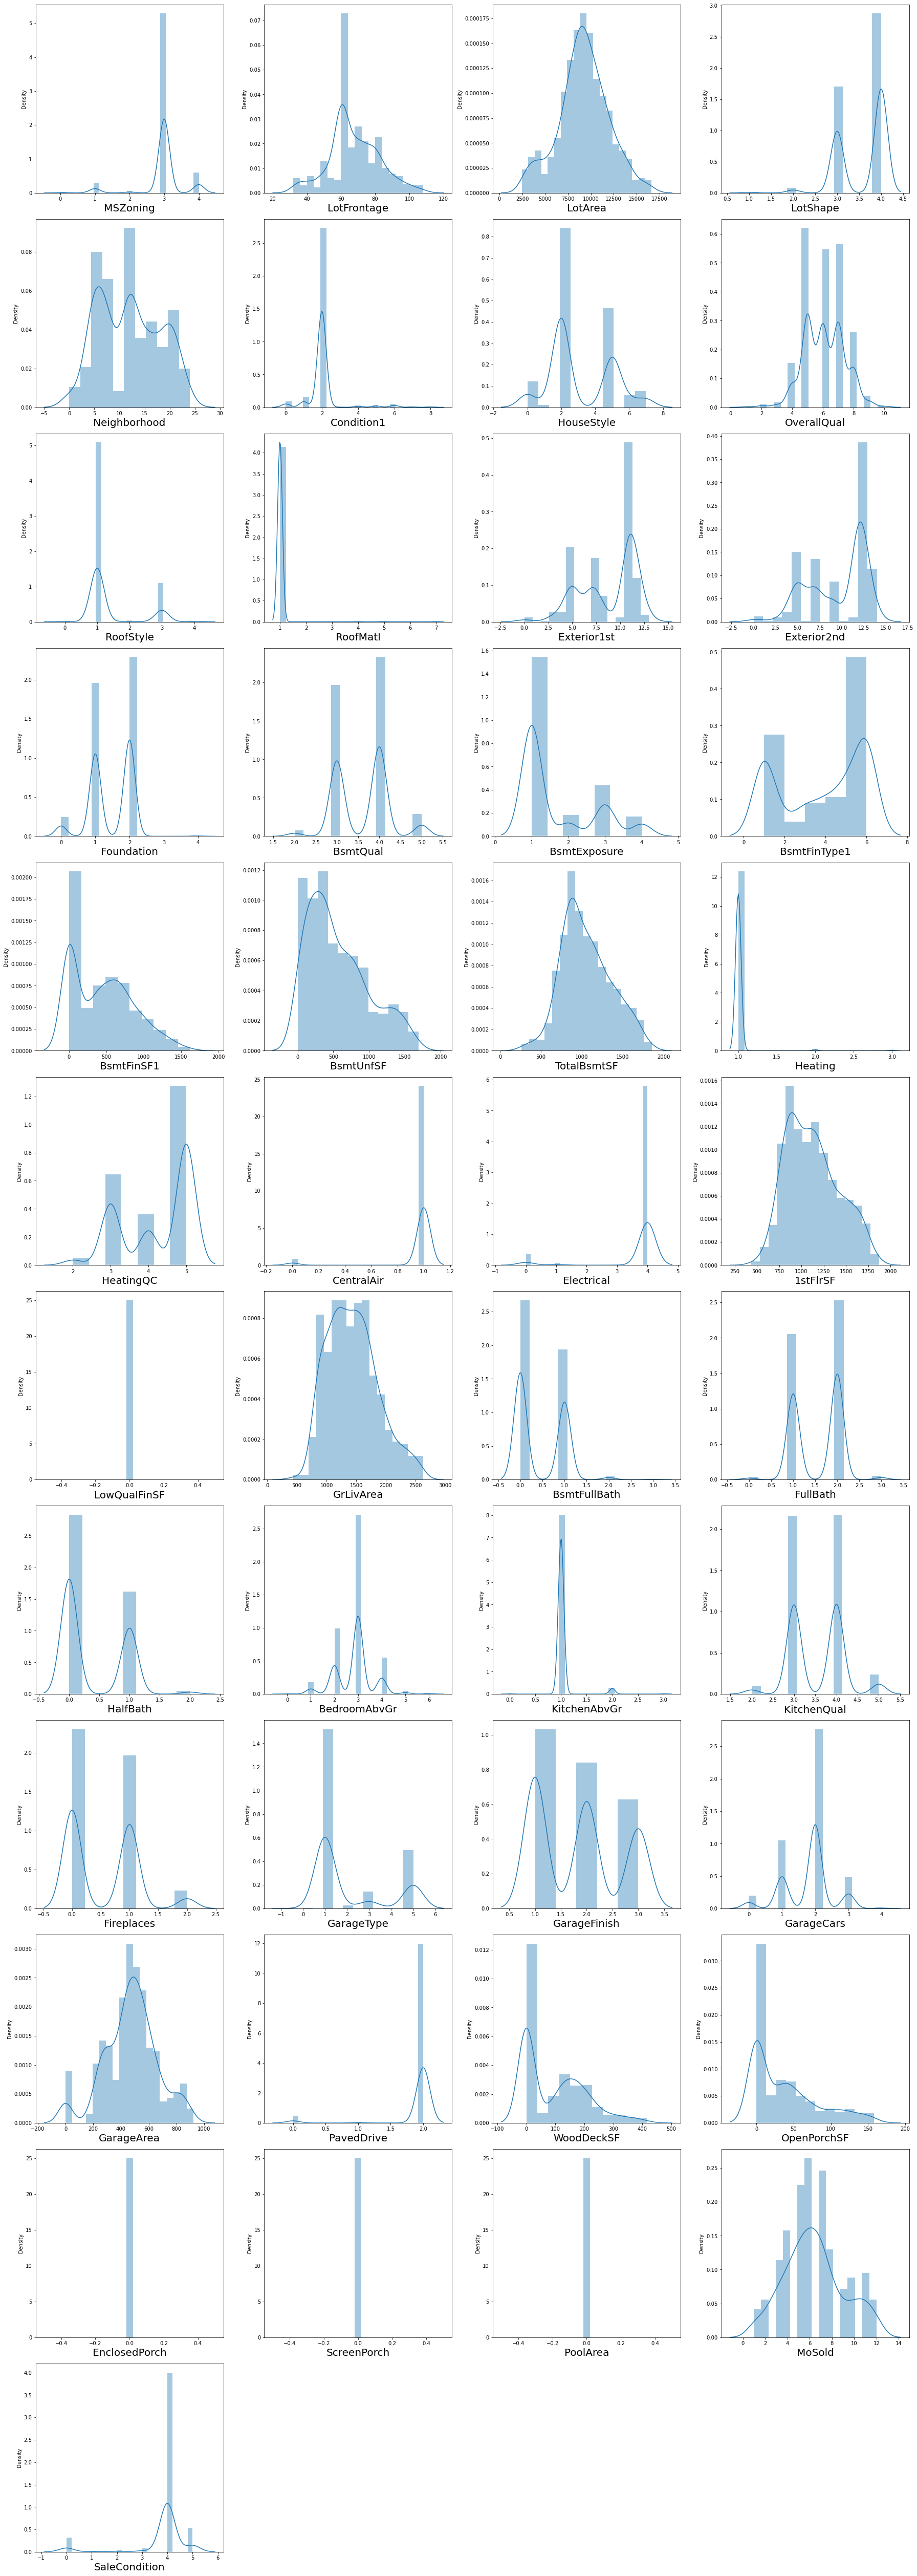

In [84]:
plt.figure(figsize=(25,70), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 48:
        ax = plt.subplot(12,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is a skewness present in the data hence using PowerTransformer to remove it

In [85]:
scaler = PowerTransformer(method='yeo-johnson')

In [86]:
df[['BsmtUnfSF','WoodDeckSF','OpenPorchSF']] = scaler.fit_transform(df[['BsmtUnfSF','WoodDeckSF','OpenPorchSF']].values)

In [87]:
x = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

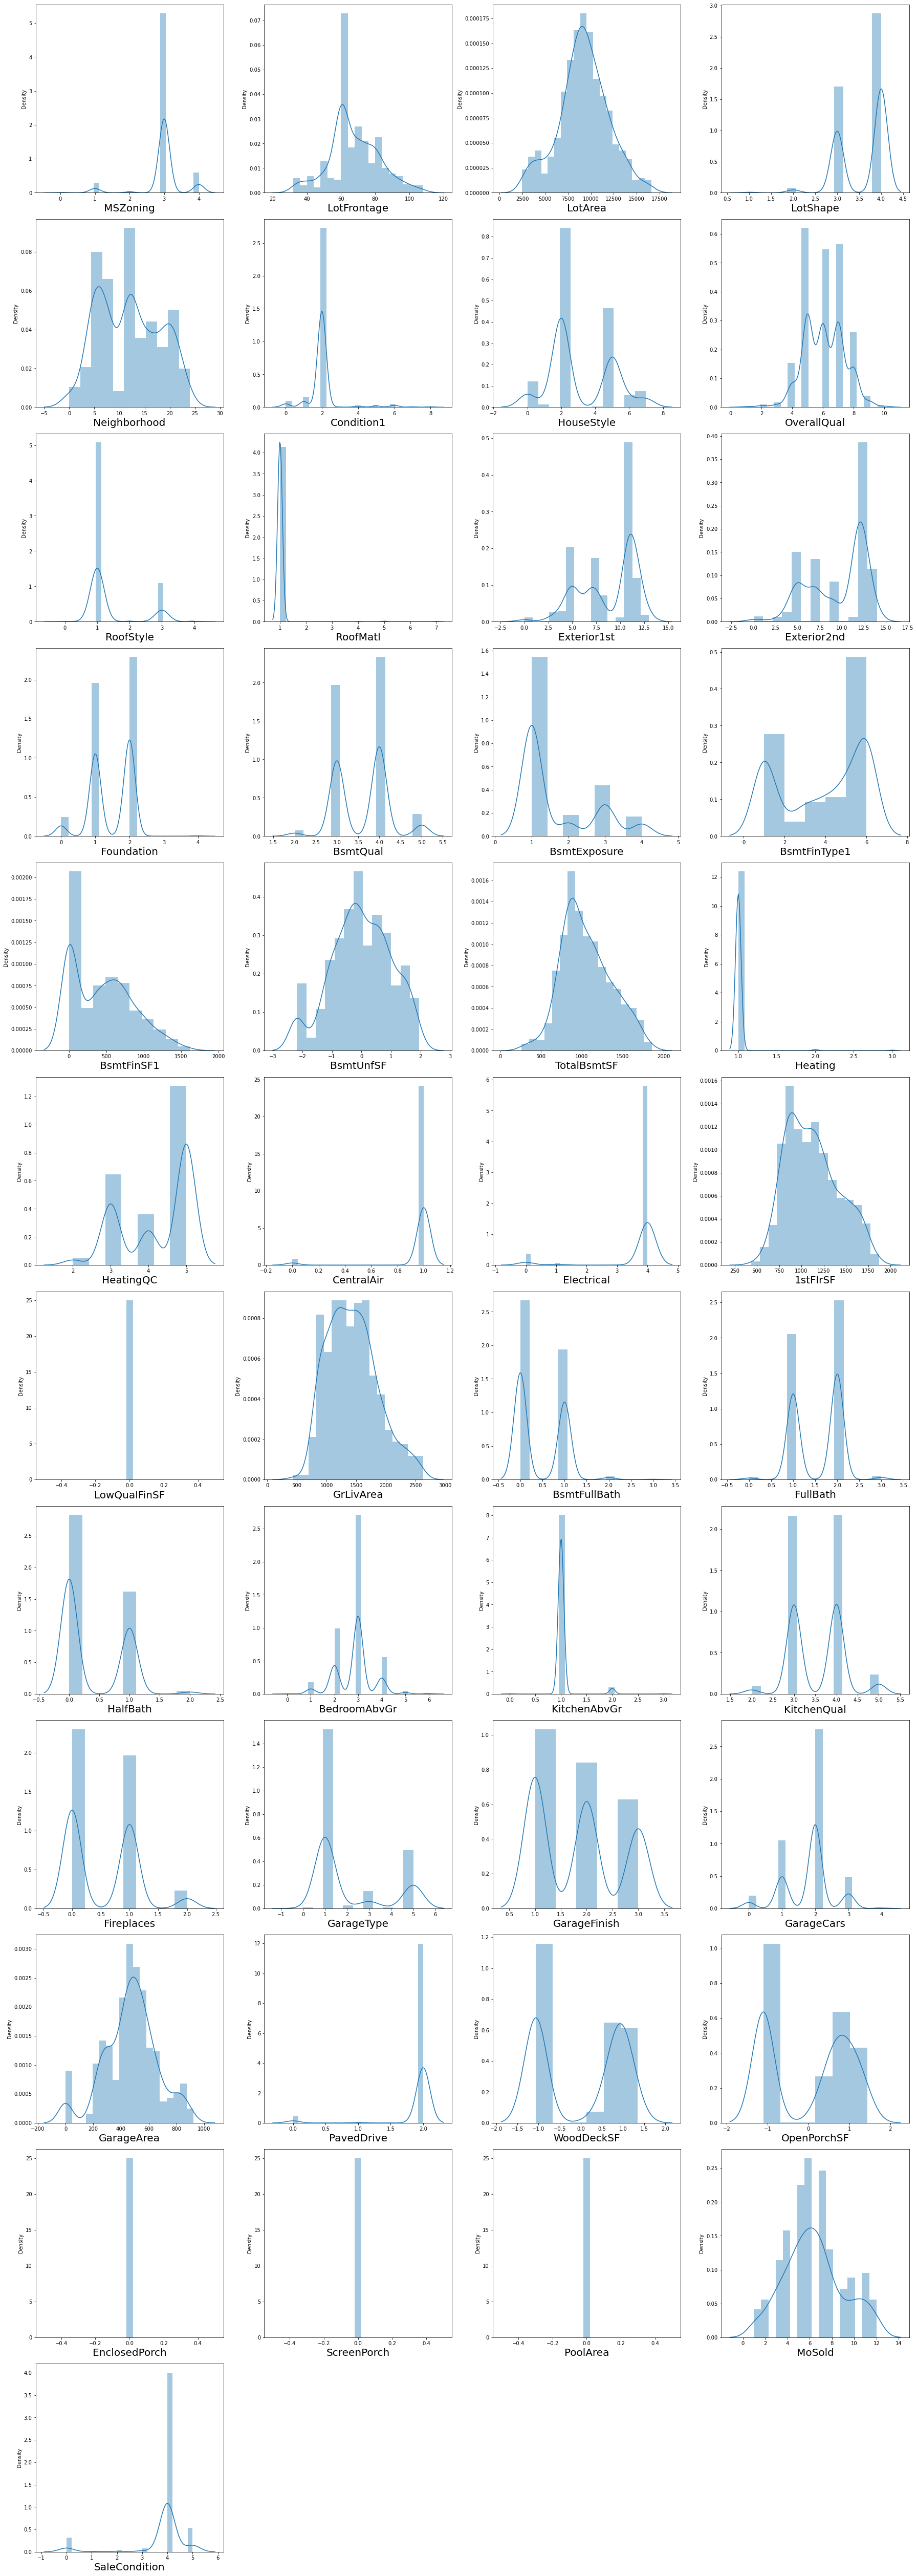

In [88]:
plt.figure(figsize=(25,70), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 48:
        ax = plt.subplot(12,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed skewness from the data

In [89]:
x = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

In [90]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

# LinearRegression

In [91]:
reg = LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.8991425908071025
At Random state 0 the testing accuracy is :- 0.8519288065230577


At Random state 1 the training accuracy is :- 0.8908130532657271
At Random state 1 the testing accuracy is :- 0.8824140827190502


At Random state 2 the training accuracy is :- 0.9057849147979838
At Random state 2 the testing accuracy is :- 0.8373098109971797


At Random state 3 the training accuracy is :- 0.8863148737904576
At Random state 3 the testing accuracy is :- 0.8921588200373745


At Random state 4 the training accuracy is :- 0.8861606368191484
At Random state 4 the testing accuracy is :- 0.8777552781062465


At Random state 5 the training accuracy is :- 0.8817054278428741
At Random state 5 the testing accuracy is :- 0.9077116521726104


At Random state 6 the training accuracy is :- 0.8901686274858652
At Random state 6 the testing accuracy is :- 0.875964048922112


At Random state 7 the training accuracy is :- 0.9014500640361439
At Random state 7 t

In [92]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 91)

In [93]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {r2_score (y_train,y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {r2_score (y_test,pred)*100:.2f}%') 
        
        print ('\n mean_absolute_error',mean_absolute_error(y_test,pred))
        print ('\n mean_squared_error',mean_squared_error (y_test,pred))
         

In [94]:
reg = LinearRegression()
reg.fit(x_train,y_train)

print_score(reg,x_train,x_test,y_train,y_test, train=True)
print_score(reg,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 88.87%

===============Test Result===============
Accuracy Score: 88.76%

 mean_absolute_error 15842.702032881449

 mean_squared_error 444225116.6597174


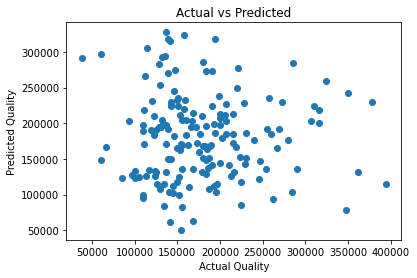

In [95]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

#### Regularization

In [96]:
Lassocv = LassoCV(alphas = np.arange(0.001,0.1,0.01), max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
prediction = lasso_reg.predict(x_test)
r2_score(y_test, prediction)

0.8876177730292795

In [97]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
rdgcv.fit(x_train, y_train)
alpha = rdgcv.alpha_
rd_model = Ridge(alpha)
rd_model.fit(x_train, y_train)
prediction = rd_model.predict(x_test)
r2_score(y_test, prediction)

0.8876144934150066

# Support Vector Regression

In [100]:
svr = SVR()
svr.fit(x_train,y_train)

print_score(svr,x_train,x_test,y_train,y_test, train=True)
print_score(svr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: -2.54%

===============Test Result===============
Accuracy Score: -4.41%

 mean_absolute_error 47431.90706294097

 mean_squared_error 4127167704.714661


# DecisionTreeRegressor

In [101]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test, train=True)
print_score(dtr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: 63.38%

 mean_absolute_error 24569.005988023953

 mean_squared_error 1447513097.257485


# AdaBoostRegressor

In [102]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test, train=True)
print_score(ada,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 89.50%

===============Test Result===============
Accuracy Score: 84.25%

 mean_absolute_error 18931.664372605515

 mean_squared_error 622449372.5824901


# GradientBoostingRegressor

In [103]:
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 97.38%

===============Test Result===============
Accuracy Score: 88.11%

 mean_absolute_error 15402.700890655258

 mean_squared_error 469902912.6598149


# RandomForestRegressor

In [104]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

print_score(rfr,x_train,x_test,y_train,y_test, train=True)
print_score(rfr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 97.80%

===============Test Result===============
Accuracy Score: 85.60%

 mean_absolute_error 16497.058802395208

 mean_squared_error 569069508.0717748


# KNeighborsRegressor

In [105]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)

print_score(knr,x_train,x_test,y_train,y_test, train=True)
print_score(knr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 87.64%

===============Test Result===============
Accuracy Score: 83.51%

 mean_absolute_error 17963.2874251497

 mean_squared_error 651937235.7722156


# Findings

- LinearRegression train accuracy score 88.87% and test accuracy score 88.76%
- Support Vector Regression train accuracy score -2.54% and test accuracy score -4.41%
- DecisionTreeRegressor train accuracy score 100.00% and test accuracy score 61.97%
- AdaBoostRegressor train accuracy score 89.29% and test accuracy score 84.48%
- GradientBoostingRegressor train accuracy score 97.38% and test accuracy score 88.17%
- RandomForestRegressor train accuracy score 97.38% and test accuracy score 88.18%
- KNeighborsRegressor train accuracy score 87.64% and test accuracy score 83.51%


# Conclusion 

##### Selecting LinearRegression since the Accuracy score and test scores are greater and close to each other.

### Saving the Model 

In [106]:
file = 'Housing_Project.pickle'
pickle.dump(reg, open(file, 'wb'))

### Predicting Sales Price for Test Data

In [107]:
X_scale_test = scaler.fit_transform(df_test) #Scaling the test data
reg_model_test = reg.predict(X_scale_test) # Predicting test scaled data

In [108]:
df_test['Sales_Price'] = reg_model_test
df_test

MSZoning  LotFrontage  LotArea  LotShape  Neighborhood  Condition1  \
0         2.0         86.0    14157         3          21.0         2.0   
1         2.0         60.0     5814         3          21.0         2.0   
2         2.0         60.0    11838         4           4.0         2.0   
3         2.0         75.0    12000         4           5.0         2.0   
4         2.0         86.0    14598         3          20.0         1.0   
..        ...          ...      ...       ...           ...         ...   
287       2.0         78.0    10206         4          20.0         2.0   
288       2.0         57.0     9245         2           4.0         2.0   
289       2.0         60.0    11241         3          11.0         2.0   
290       3.0         50.0     5000         4           2.0         1.0   
291       3.0         21.0     1953         4           1.0         2.0   

     HouseStyle  OverallQual  RoofStyle  RoofMatl  ...  GarageArea  \
0           2.0            9        3.0       0.0  ...         676   
1           2.0            8        1.0       0.0  ...         565   
2           2.0            8        3.0       0.0  ...         522   
3           5.0            7        1.0       0.0  ...         234   
4           5.0            6        1.0       0.0  ...         668   
..          ...          ...        ...       ...  ...         ...   
287         2.0            8        1.0       0.0  ...         758   
288         2.0            5        1.0       0.0  ...         672   
289         2.0            6        1.0       0.0  ...         480   
290         0.0            6        1.0       0.0  ...         420   
291         5.0            6        1.0       0.0  ...         264   

     PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
0             2         178           51              0            0   
1             2          63            0              0            0   
2             2         202          151              0            0   
3             2           0            0              0            0   
4             2         100           18              0            0   
..          ...         ...          ...            ...          ...   
287           2         144           99              0            0   
288           2           0            0              0            0   
289           2           0            0              0            0   
290           2           0           24             36            0   
291           2          72            0              0            0   

     PoolArea  MoSold  SaleCondition    Sales_Price  
0           0       7            2.0  295965.449138  
1           0       8            0.0  218315.416522  
2           0       6            2.0  235463.468489  
3           0       7            2.0  154093.403813  
4           0       1            2.0  204423.900618  
..        ...     ...            ...            ...  
287         0      10            2.0  225998.831440  
288         0       2            2.0  145642.950116  
289         0       3            2.0  152097.244873  
290         0      10            2.0  178246.241748  
291         0       6            2.0  121438.013835  

[291 rows x 46 columns]